# Data Challenge Text-Mining Green Way

Autors:
* Joanna Siy Haacke
* Kailash Padhiyar 
* Sebastian Zabala

## Reading the data

In [1]:
# Libraries import
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
import requests
from bs4 import BeautifulSoup
from copy import copy

In [2]:
# Load the dataset
#file_path = 'E:/python/Dataset/OnlineNewsPopularity.csv'
df = pd.read_csv("OnlineNewsPopularity.csv")
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

# Data Preparation 

In [5]:
#Removing Space Character from Feature names
df.columns = df.columns.str.replace(' ', '')

In [6]:
# describing the data
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [7]:
df.shape  

(39644, 61)

In [8]:
# removing duplicates
df=df.drop_duplicates()
df.shape # there are no duplicates

(39644, 61)

In [9]:
#checking for all variables that contain missing values
n=df.isna().sum()
n[n>0] # there are no duplicates

Series([], dtype: int64)

In [10]:
df.dtypes

url                              object
timedelta                       float64
n_tokens_title                  float64
n_tokens_content                float64
n_unique_tokens                 float64
                                 ...   
title_subjectivity              float64
title_sentiment_polarity        float64
abs_title_subjectivity          float64
abs_title_sentiment_polarity    float64
shares                            int64
Length: 61, dtype: object

In [ ]:
# Feature Extraction from URL
def extract_url_features(url):
    parsed_url = urlparse(url)
    return pd.Series({
        'domain': parsed_url.netloc,
        'url_length': len(url),
        'num_subdirectories': url.count('/')
    })

df[['domain', 'url_length', 'num_subdirectories']] = df['url'].apply(extract_url_features)


In [10]:
# Web Scraping: Extract Title or Meta Description from URL (Optional & Time-Consuming)
def fetch_page_title(url):
    try:
        response = requests.get(url, timeout=5)
        soup = BeautifulSoup(response.text, 'html.parser')
        title = soup.title.string if soup.title else "No Title"
        return title
    except:
        return "Error"

# Feature Engineering

## Feature Engineering (Web Scrapping and Sentiment Analysis of news variables)

In [9]:
import asyncio
import math
import csv
import aiohttp
from bs4 import BeautifulSoup
import pandas as pd

# Function to scrape a URL and extract meaningful content
async def scrape_url(url, session):
    """Fetch webpage content and extract meaningful text."""
    try:
        async with session.get(url) as response:
            html = await response.text()
            soup = BeautifulSoup(html, "html.parser")
            
            # Extract text from paragraph tags
            text = " ".join([p.get_text() for p in soup.find_all("p")])
            
            # Ensure text is not empty
            if not text.strip():
                text = "No meaningful content found."

            return {"url": url, "text": text}
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return {"url": url, "text": "Error retrieving content"}

# Function to process a batch of URLs asynchronously
async def process_batch(batch_urls, session):
    """Process a batch of URLs asynchronously."""
    tasks = [scrape_url(url, session) for url in batch_urls]
    return await asyncio.gather(*tasks)

# Function to write the scraped results to a CSV file
def write_to_csv(results, output_file):
    """Write scraped results to CSV."""
    with open(output_file, mode="a", newline="", encoding="utf-8") as file:
        writer = csv.DictWriter(file, fieldnames=["url", "text"])
        writer.writerows(results)

# Main function to handle batching and scraping
async def main(urls, batch_size=100, output_file="scraped_results_2.csv"):
    """Main function to handle batching and scraping."""
    total_urls = len(urls)
    print(f"Total URLs to process: {total_urls}")

    # Create new file and write header only if it doesn't exist
    with open(output_file, mode="w", newline="", encoding="utf-8") as file:
        writer = csv.DictWriter(file, fieldnames=["url", "text"])
        writer.writeheader()

    connector = aiohttp.TCPConnector(limit=10)
    async with aiohttp.ClientSession(connector=connector) as session:
        for i in range(0, total_urls, batch_size):
            batch_urls = urls[i : i + batch_size]
            print(f"Processing batch {i // batch_size + 1} of {math.ceil(total_urls / batch_size)}...")
            batch_results = await process_batch(batch_urls, session)
            batch_results = [result for result in batch_results if result is not None]
            write_to_csv(batch_results, output_file)
    
    print(f"All batches processed. Results saved in {output_file}.")

# If running in a Jupyter Notebook, directly use await instead of asyncio.run()
if __name__ == "__main__":
    # Load URLs from dataset
    df = pd.read_csv("OnlineNewsPopularity.csv")  # Replace with your actual CSV file
    urls = df['url'].tolist()

    # Use await directly for Jupyter Notebook or interactive environments
    await main(urls, batch_size=100, output_file="scraped_results_2.csv")


Total URLs to process: 39644
Processing batch 1 of 397...


C:\Users\joans\anaconda3\lib\site-packages\bs4\__init__.py:597: RuntimeWarning: coroutine 'main' was never awaited
  for i in current_data:


Processing batch 2 of 397...
Processing batch 3 of 397...
Processing batch 4 of 397...
Processing batch 5 of 397...
Processing batch 6 of 397...
Processing batch 7 of 397...
Processing batch 8 of 397...
Processing batch 9 of 397...
Processing batch 10 of 397...
Processing batch 11 of 397...
Processing batch 12 of 397...
Processing batch 13 of 397...
Processing batch 14 of 397...
Processing batch 15 of 397...
Processing batch 16 of 397...
Processing batch 17 of 397...
Processing batch 18 of 397...
Processing batch 19 of 397...
Processing batch 20 of 397...
Processing batch 21 of 397...
Processing batch 22 of 397...
Processing batch 23 of 397...
Processing batch 24 of 397...
Processing batch 25 of 397...
Processing batch 26 of 397...
Processing batch 27 of 397...
Processing batch 28 of 397...
Processing batch 29 of 397...
Processing batch 30 of 397...
Processing batch 31 of 397...
Processing batch 32 of 397...
Processing batch 33 of 397...
Processing batch 34 of 397...
Processing batch 3

In [ ]:
# create the df: 
# scraped_text_df = pd.read_csv("scraped_results_2.csv")

# Check for duplicates in the 'url' column
# duplicates = scraped_text_df[scraped_text_df.duplicated(subset='url')]
# print(f"Number of duplicate URLs: {duplicates.shape[0]}")

# Check for missing values in the dataframe
#missing_values = scraped_text_df.isnull().sum()
#print(f"Missing values per column:\n{missing_values}"

# Fill missing values
# scraped_text_df['text'].fillna('No meaningful content found', inplace=True)


In [ ]:
scraped_text_df = pd.read_csv("scraped_results_2.csv")

In [19]:
# Check for duplicates based on both 'url' and 'text' columns
duplicates = scraped_text_df[scraped_text_df.duplicated(subset=['url', 'text'])]
print(f"Number of duplicate entries (URL + Text): {duplicates.shape[0]}")

Number of duplicate entries (URL + Text): 0


In [23]:
# Check for missing values in the dataframe
missing_values = scraped_text_df.isnull().sum()
print(f"Missing values per column:\n{missing_values}")

Missing values per column:
url     0
text    0
dtype: int64


In [25]:
# Get number of unique URLs
unique_urls = scraped_text_df['url'].nunique()
print(f"Number of unique URLs: {unique_urls}")

# Get number of unique text entries
unique_text = scraped_text_df['text'].nunique()
print(f"Number of unique text entries: {unique_text}")

Number of unique URLs: 39644
Number of unique text entries: 39607


In [27]:
# Find duplicate URLs with different text entries
duplicate_urls = scraped_text_df[scraped_text_df.duplicated(subset='url', keep=False)]
print(f"Number of URLs with different texts: {duplicate_urls.shape[0]}")

# Group by URL and check how many unique texts are associated with each URL
url_text_groups = scraped_text_df.groupby('url')['text'].nunique()
urls_with_multiple_texts = url_text_groups[url_text_groups > 1]
print(f"URLs with multiple text entries: {urls_with_multiple_texts}")


Number of URLs with different texts: 0
URLs with multiple text entries: Series([], Name: text, dtype: int64)


In [29]:
# Check for text entries associated with more than one URL (if such case exists)
text_url_groups = scraped_text_df.groupby('text')['url'].nunique()
texts_with_multiple_urls = text_url_groups[text_url_groups > 1]
print(f"Texts associated with multiple URLs: {texts_with_multiple_urls}")

#--  "No meaningful content found = 36

Texts associated with multiple URLs: text
A 9-year-old girl accidentally shot and killed a shooting instructor with an automatic Uzi in White Hills, Arizona, authorities said in a statement Tuesday. The girl, who was unidentified, shot 39-year-old instructor Charles Vacca in the head on Monday, Mohave County Sherriff's deputies said in a release. She was learning how to use the weapon. The shooting took place around 10 a.m. local time at Last Stop, a business with a shooting range that's located in the ghost town. The girl, who police did not identify, was accompanied by her parents. A Fox 10 Phoenix YouTube video shows Vacca positioning the girl, who is wearing pink shorts and pink earmuffs, during part of the lesson before he was shot. The video cuts off before the fatal shot, though the gun appears to be lurching out of the girl's control.  When the girl pulled the Uzi's trigger, the recoil sent the gun over her head and shot Vacca, who was standing next to her, investigators determ

In [39]:
a = 39644
b = 39607
difference = a-b
print(difference)

37


In [41]:
# Merge DataFrames based on 'url'
merged_df = pd.merge(df, scraped_text_df, on='url', how='left')

In [43]:
merged_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,text
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Having trouble finding something to watch on A...
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,The Associated Press is the latest news organi...
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,It looks like 2012 was a pretty good year for ...
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,"When it comes to college football, NASA astron..."
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,LAS VEGAS -- Sharing photos and videos on your...


In [45]:
pip install textblob

In [47]:
from textblob import TextBlob

In [51]:
# Function to calculate polarity and subjectivity using TextBlob
def get_polarity_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

In [53]:
merged_df[['polarity', 'subjectivity']] = merged_df['text'].apply(lambda x: pd.Series(get_polarity_subjectivity(x)))

In [55]:
num_columns = merged_df.shape[1]
print(f"Number of columns: {num_columns}")
print("Column names:", merged_df.columns.tolist())

Number of columns: 64
Column names: ['url', ' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negati

In [59]:
# Check for missing values in the dataframe
missing_values = merged_df.isnull().sum()
print(f"Missing values per column:\n{missing_values}")

Missing values per column:
url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 abs_title_sentiment_polarity    0
 shares                          0
text                             0
polarity                         0
subjectivity                     0
Length: 64, dtype: int64


In [13]:
# Flesch-Kincaid Grade Level: Estimates the U.S. school grade level required to understand the text.
# Gunning Fog Index: Indicates the years of formal education needed to comprehend the text on a first reading.
# SMOG Index: Focuses on the number of complex words to assess readability.
# These metrics can help determine if the complexity of the language affects article popularity.

In [61]:
pip install textstat


   ---------------------------------------- 0.0/105.3 kB ? eta -:--:--
   --- ------------------------------------ 10.2/105.3 kB ? eta -:--:--
   ----------- --------------------------- 30.7/105.3 kB 640.0 kB/s eta 0:00:01
   ------------------------------ -------- 81.9/105.3 kB 919.0 kB/s eta 0:00:01
   -------------------------------------- 105.3/105.3 kB 864.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/939.4 kB ? eta -:--:--
   --- ------------------------------------ 71.7/939.4 kB 3.8 MB/s eta 0:00:01
   ------- -------------------------------- 184.3/939.4 kB 2.8 MB/s eta 0:00:01
   ------------- -------------------------- 307.2/939.4 kB 2.7 MB/s eta 0:00:01
   ----------------- ---------------------- 399.4/939.4 kB 2.8 MB/s eta 0:00:01
   ------------------- -------------------- 460.8/939.4 kB 2.2 MB/s eta 0:00:01
   ----------------------------------- ---- 829.4/939.4 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 939.4/939.4 kB 3.1 MB/

In [63]:
import textstat

# Apply readability formulas
merged_df["flesch_kincaid"] = merged_df["text"].apply(textstat.flesch_kincaid_grade)
merged_df["gunning_fog"] = merged_df["text"].apply(textstat.gunning_fog)
merged_df["smog_index"] = merged_df["text"].apply(textstat.smog_index)

# Display summary statistics
print(merged_df[["flesch_kincaid", "gunning_fog", "smog_index"]].describe())


       flesch_kincaid   gunning_fog    smog_index
count    39644.000000  39644.000000  39644.000000
mean        10.365226     11.446184     12.181672
std          2.243287      2.169118      2.149192
min          0.500000      0.800000      0.000000
25%          8.900000     10.050000     11.100000
50%         10.300000     11.370000     12.200000
75%         11.700000     12.740000     13.400000
max         55.700000     54.760000     30.800000


In [65]:
merged_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,text,polarity,subjectivity,flesch_kincaid,gunning_fog,smog_index
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,-0.187500,0.000000,0.187500,593,Having trouble finding something to watch on A...,0.092562,0.521617,12.2,13.61,14.2
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.000000,0.500000,0.000000,711,The Associated Press is the latest news organi...,0.148948,0.341246,11.9,14.29,14.0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.000000,0.500000,0.000000,1500,It looks like 2012 was a pretty good year for ...,0.323333,0.702222,10.4,11.85,12.1
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.000000,0.500000,0.000000,1200,"When it comes to college football, NASA astron...",0.110185,0.412422,8.1,9.63,10.1
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.136364,0.045455,0.136364,505,LAS VEGAS -- Sharing photos and videos on your...,0.190663,0.438122,9.5,11.22,12.7


In [14]:
# Named Entity Recognition (NER):

# Entity Counts: Identify and count entities such as people, organizations, locations, dates, etc.
# Specific Entities: Track mentions of trending personalities or events, as their presence might influence popularity.
# NER can provide insights into the subjects covered in the article and their potential appeal.

In [69]:
pip install spacy textblob


  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
  Attempting uninstall: annotated-types
    Found existing installation: annotated-types 0.5.0
    Uninstalling annotated-types-0.5.0:
      Successfully uninstalled annotated-types-0.5.0


In [75]:
pip install vaderSentiment


   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --------- ----------------------------- 30.7/126.0 kB 262.6 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/126.0 kB 365.7 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 672.7 kB/s eta 0:00:00


In [77]:
import spacy
import pandas as pd
import numpy as np
from textblob import TextBlob
from joblib import Parallel, delayed  # For parallel processing
from tqdm import tqdm  # Progress bar for large datasets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# Save results
merged_df.to_csv("merged_data_with_ner_sentiment.csv", index=False)
print("NER-based sentiment features added successfully! ✅ (Energy-efficient mode)")

In [ ]:
print(merged_df[["NER_sentiment_polarity", "global_sentiment_polarity"]].corr())

In [ ]:
# Use of Multimedia: Presence of images, videos, or infographics within the text.
# Type-Token Ratio (TTR)
# Hapax Legomena (Unique words appearing once)
# Keep Keyword Density If SEO Impact is a Priority

In [ ]:
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

def extract_ner_counts(text):
    """
    Extracts named entity counts from the given text.

    Args:
        text (str): The input text.

    Returns:
        dict: A dictionary with entity labels as keys and their counts as values.
    """
    doc = nlp(text)
    entity_counts = {}
    for ent in doc.ents:
        if ent.label_ in entity_counts:
            entity_counts[ent.label_] += 1
        else:
            entity_counts[ent.label_] = 1
    return entity_counts


In [ ]:
import pandas as pd
from tqdm import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from joblib import Parallel, delayed

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Ensure 'text' column exists in merged_df
if 'text' not in merged_df.columns:
    raise ValueError("The DataFrame must contain a 'text' column.")

# Step 1: Extract NER counts
def process_ner(text):
    return extract_ner_counts(text)

tqdm.pandas(desc="Extracting NER counts")
merged_df['ner_counts'] = merged_df['text'].progress_apply(process_ner)

# Step 2: Perform sentiment analysis using VADER
def process_sentiment(text):
    return analyzer.polarity_scores(text)

tqdm.pandas(desc="Analyzing sentiment")
sentiment_scores = merged_df['text'].progress_apply(process_sentiment)
sentiment_df = pd.DataFrame(sentiment_scores.tolist())

# Concatenate sentiment DataFrame with the original DataFrame
merged_df = pd.concat([merged_df, sentiment_df], axis=1)

# Save the enriched DataFrame
merged_df.to_csv("merged_data_with_ner_sentiment.csv", index=False)
print("NER counts and sentiment features added successfully!")


In [17]:
import os
print(os.getcwd())  # This prints the current working directory

C:\Users\joans\Downloads


In [27]:
import os
print(os.path.exists("C:/Users/joans/Downloads/merged_df_1.csv"))

False


In [29]:
import pandas as pd
merged_df = pd.read_csv("C:/Users/joans/Downloads/merged_df_1.csv")  # Change this path

In [31]:
merged_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,shares,text,ner_counts,neg,neu,pos,compound,flesch_kincaid,gunning_fog,smog_index
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,593,Having trouble finding something to watch on A...,"{'ORG': 8, 'DATE': 3, 'WORK_OF_ART': 2, 'GPE':...",0.022,0.878,0.100,0.9224,12.2,13.61,14.2
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,711,The Associated Press is the latest news organi...,"{'ORG': 12, 'PERSON': 2, 'DATE': 3, 'GPE': 1, ...",0.000,0.947,0.053,0.9081,11.9,14.29,14.0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1500,It looks like 2012 was a pretty good year for ...,"{'DATE': 9, 'ORG': 7, 'PERSON': 3, 'FAC': 1, '...",0.009,0.841,0.150,0.9827,10.4,11.85,12.1
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,1200,"When it comes to college football, NASA astron...","{'ORG': 19, 'PERSON': 1, 'NORP': 6, 'FAC': 8, ...",0.005,0.838,0.157,0.9977,8.1,9.63,10.1
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,505,LAS VEGAS -- Sharing photos and videos on your...,"{'GPE': 2, 'ORG': 15, 'CARDINAL': 1, 'DATE': 2...",0.005,0.903,0.092,0.9697,9.5,11.22,12.7


In [33]:
import pandas as pd
from textblob import TextBlob
from joblib import Parallel, delayed

# Function to compute TTR using TextBlob (optimized for large datasets)
def compute_ttr_textblob(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0  # Return 0 if text is empty or non-string
    blob = TextBlob(text)
    words = [word.lower() for word in blob.words if word.isalpha()]  # Tokenize and filter non-alphabetic words
    unique_words = set(words)  # Get unique words
    return len(unique_words) / len(words) if len(words) > 0 else 0  # Compute TTR

# Option 1: Using Pandas apply (Efficient for smaller-medium datasets)
# merged_df["TTR"] = merged_df["article_text"].apply(compute_ttr_textblob)

# Option 2: Parallelizing the operation for large datasets
def parallel_ttr_calculation(texts):
    return Parallel(n_jobs=-1)(delayed(compute_ttr_textblob)(text) for text in texts)

# Replace 'your_text_column' with the actual column name from your dataset
text_column_name = 'text'  # Adjust this to the correct column name

# Apply in parallel for a large dataset
merged_df["TTR"] = pd.Series(parallel_ttr_calculation(merged_df[text_column_name]))

# Display the result to verify
print(merged_df[["TTR"]].head())


        TTR
0  0.661692
1  0.591667
2  0.578035
3  0.488889
4  0.536496


In [35]:
merged_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,text,ner_counts,neg,neu,pos,compound,flesch_kincaid,gunning_fog,smog_index,TTR
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,Having trouble finding something to watch on A...,"{'ORG': 8, 'DATE': 3, 'WORK_OF_ART': 2, 'GPE':...",0.022,0.878,0.100,0.9224,12.2,13.61,14.2,0.661692
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,The Associated Press is the latest news organi...,"{'ORG': 12, 'PERSON': 2, 'DATE': 3, 'GPE': 1, ...",0.000,0.947,0.053,0.9081,11.9,14.29,14.0,0.591667
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,It looks like 2012 was a pretty good year for ...,"{'DATE': 9, 'ORG': 7, 'PERSON': 3, 'FAC': 1, '...",0.009,0.841,0.150,0.9827,10.4,11.85,12.1,0.578035
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,"When it comes to college football, NASA astron...","{'ORG': 19, 'PERSON': 1, 'NORP': 6, 'FAC': 8, ...",0.005,0.838,0.157,0.9977,8.1,9.63,10.1,0.488889
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,LAS VEGAS -- Sharing photos and videos on your...,"{'GPE': 2, 'ORG': 15, 'CARDINAL': 1, 'DATE': 2...",0.005,0.903,0.092,0.9697,9.5,11.22,12.7,0.536496


In [37]:
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter
from joblib import Parallel, delayed
import nltk

# Download NLTK resources if not already downloaded
nltk.download('punkt')

# Function to compute Hapax Legomena efficiently
def compute_hapax(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0  # Return 0 if the text is empty or non-string
    # Tokenize using nltk
    words = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    words = [word for word in words if word.isalpha()]  # Filter out non-alphabetic words
    word_counts = Counter(words)  # Count the frequency of each word
    hapax_count = sum(1 for count in word_counts.values() if count == 1)  # Count hapax legomena
    return hapax_count / len(words) if len(words) > 0 else 0  # Calculate the ratio

# Function to apply parallel processing for large datasets
def parallel_hapax_calculation(texts):
    return Parallel(n_jobs=-1)(delayed(compute_hapax)(text) for text in texts)

# Example: Assuming the column containing text is 'your_text_column'
text_column_name = 'text'  # Adjust this to your actual text column name

# Apply in parallel for a large dataset
merged_df["Hapax_Ratio"] = pd.Series(parallel_hapax_calculation(merged_df[text_column_name]))

# Display the result to verify
print(merged_df[["Hapax_Ratio"]].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joans\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


   Hapax_Ratio
0     0.527363
1     0.445833
2     0.433526
3     0.351893
4     0.368613


In [41]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [43]:
merged_df.to_csv("merged_df.csv", index=False) 

In [53]:
# Identify text columns (you can manually list them if you know which ones)
text_columns = ['text']  # Replace with actual text column names

# Remove the text columns from the DataFrame
merged_df_2 = merged_df.drop(columns=text_columns)

# Add an index to the DataFrame
merged_df_2 = merged_df_2.reset_index(drop=False)  # This adds the default index

# Save the cleaned DataFrame to a new file
merged_df_2.to_csv('merged_df_2.csv', index=False)  # Saves it without the index column


In [51]:
merged_df_2.columns

Index(['index', 'url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' gl

In [69]:
import pandas as pd
from scipy.stats import shapiro, kstest

# List of variables to check for normality
variables = ['neg', 'neu', 'pos', 'compound', 'flesch_kincaid', 
             'gunning_fog', 'smog_index', 'TTR', 'Hapax_Ratio']

for var in variables:
    # Ensure the variable is numeric, coercing errors into NaN
    merged_df_2[var] = pd.to_numeric(merged_df_2[var], errors='coerce')
    
    # Drop NaN values before testing for normality
    valid_data = merged_df_2[var].dropna()
    
    if valid_data.empty:
        print(f'{var} has no valid numeric data to test.')
        continue

    # Shapiro-Wilk test for normality
    stat, p_value = shapiro(valid_data)  # Drop NaN values for the test
    print(f'{var}: Shapiro-Wilk Test statistic = {stat:.3f}, p-value = {p_value:.3f}')
    if p_value > 0.05:
        print(f"{var} is normally distributed (fail to reject H0)")
    else:
        print(f"The data for {var} does not follow a normal distribution (reject H0)")

    # Kolmogorov-Smirnov test for normality (alternative)
    stat, p_value_ks = kstest(valid_data, 'norm')
    print(f'{var}: K-S Test statistic = {stat:.3f}, p-value = {p_value_ks:.3f}')
    if p_value_ks > 0.05:
        print(f"{var} is normally distributed (fail to reject H0)")
    else:
        print(f"The data for {var} does not follow a normal distribution (reject H0)")


C:\Users\joans\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


neg: Shapiro-Wilk Test statistic = 0.863, p-value = 0.000
The data for neg does not follow a normal distribution (reject H0)
neg: K-S Test statistic = 0.500, p-value = 0.000
The data for neg does not follow a normal distribution (reject H0)
neu: Shapiro-Wilk Test statistic = 0.977, p-value = 0.000
The data for neu does not follow a normal distribution (reject H0)
neu: K-S Test statistic = 0.736, p-value = 0.000
The data for neu does not follow a normal distribution (reject H0)
pos: Shapiro-Wilk Test statistic = 0.955, p-value = 0.000
The data for pos does not follow a normal distribution (reject H0)
pos: K-S Test statistic = 0.500, p-value = 0.000
The data for pos does not follow a normal distribution (reject H0)
compound: Shapiro-Wilk Test statistic = 0.645, p-value = 0.000
The data for compound does not follow a normal distribution (reject H0)
compound: K-S Test statistic = 0.469, p-value = 0.000
The data for compound does not follow a normal distribution (reject H0)
flesch_kincaid: 

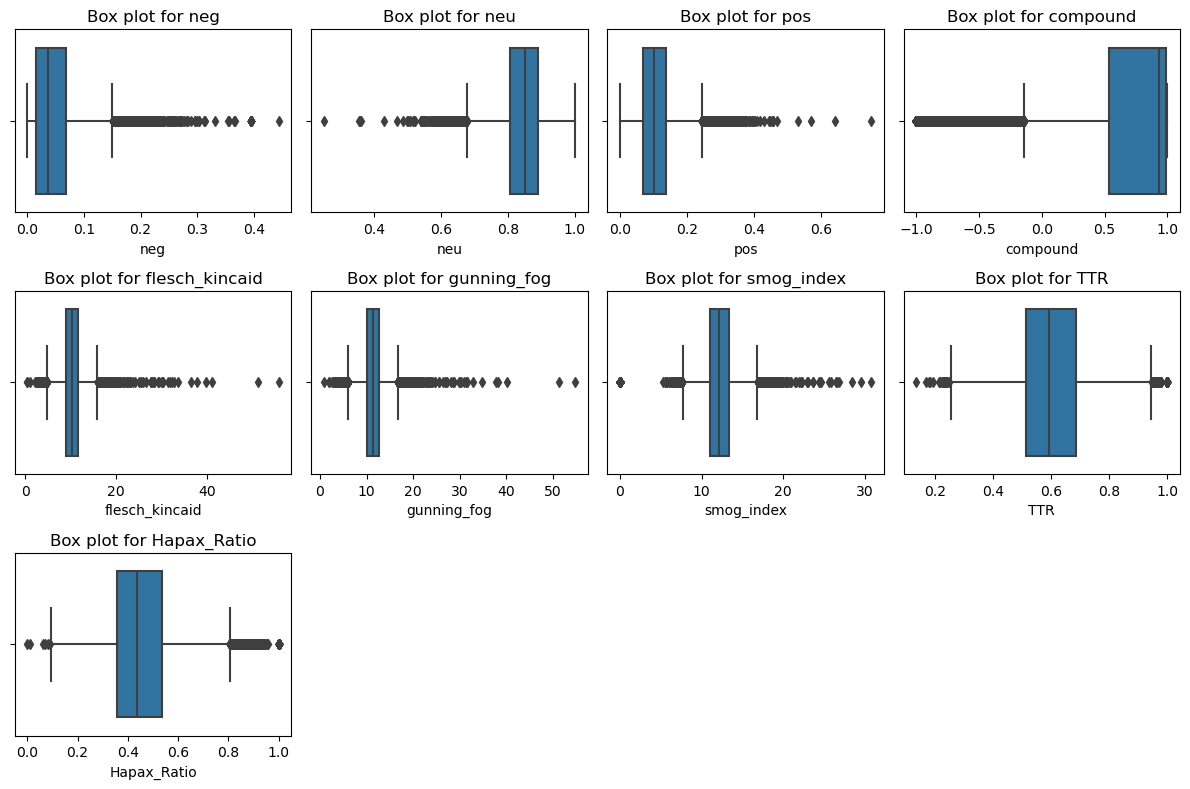

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to check
variables = ['neg', 'neu', 'pos', 'compound', 'flesch_kincaid', 
             'gunning_fog', 'smog_index', 'TTR', 'Hapax_Ratio']

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Create box plots for each variable
for i, var in enumerate(variables, 1):
    plt.subplot(3, 4, i)  # Arrange the box plots in a grid (3 rows, 4 columns)
    sns.boxplot(x=merged_df[var].dropna())  # Drop NaN values before plotting
    plt.title(f'Box plot for {var}')
    plt.tight_layout()

plt.show()


In [79]:
import pandas as pd
from scipy.stats import skew

# List of variables to check for skewness
variables = ['neg', 'neu', 'pos', 'compound', 'flesch_kincaid', 
             'gunning_fog', 'smog_index', 'TTR', 'Hapax_Ratio']

# Calculate and print skewness for each variable
for var in variables:
    # Drop NaN values to avoid issues
    data = merged_df[var].dropna()
    
    # Calculate skewness
    skewness_value = skew(data)
    print(f'{var}: Skewness = {skewness_value:.3f}')


neg: Skewness = 1.712
neu: Skewness = -0.678
pos: Skewness = 0.988
compound: Skewness = -1.498
flesch_kincaid: Skewness = 1.116
gunning_fog: Skewness = 1.019
smog_index: Skewness = -1.426
TTR: Skewness = 0.294
Hapax_Ratio: Skewness = 0.685


In [81]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

# List of positively skewed variables (based on your skewness values)
positively_skewed = ['neg', 'pos', 'flesch_kincaid', 'gunning_fog']

# List of negatively skewed variables (based on your skewness values)
negatively_skewed = ['neu', 'compound', 'smog_index']

# Efficient Log Transformation for positively skewed variables (vectorized)
for var in positively_skewed:
    merged_df_2[var] = np.log(merged_df[var] + 1)  # Vectorized log transformation
print("Log transformation applied to positively skewed variables.")

# Efficient Square Root Transformation for negatively skewed variables (vectorized)
for var in negatively_skewed:
    merged_df_2[var] = np.sqrt(merged_df[var] - merged_df[var].min() + 1)  # Vectorized square root transformation
print("Square root transformation applied to negatively skewed variables.")

# Alternatively, if cube root transformation is preferred:
# for var in negatively_skewed:
#     merged_df[var] = np.cbrt(mergbed_df[var])  # Vectorized cube root transformation

# Apply Yeo-Johnson transformation to all relevant variables (flexible for both negative and positive skewness)
transformer = PowerTransformer(method='yeo-johnson')

merged_df_2[['neg', 'pos', 'flesch_kincaid', 'gunning_fog', 'neu', 'compound', 'smog_index']] = \
    transformer.fit_transform(merged_df[['neg', 'pos', 'flesch_kincaid', 'gunning_fog', 'neu', 'compound', 'smog_index']])
print("Yeo-Johnson transformation applied to all relevant variables.")


Log transformation applied to positively skewed variables.
Square root transformation applied to negatively skewed variables.
Yeo-Johnson transformation applied to all relevant variables.


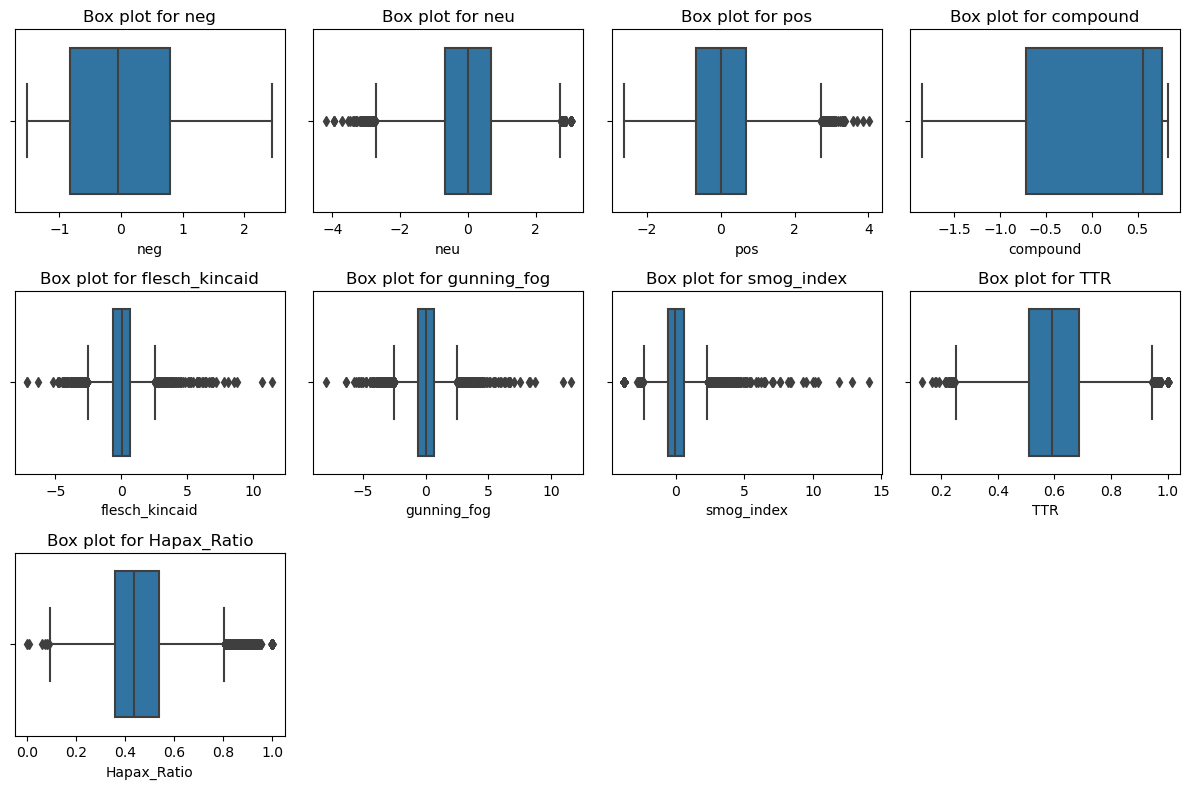

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to check
variables = ['neg', 'neu', 'pos', 'compound', 'flesch_kincaid', 
             'gunning_fog', 'smog_index', 'TTR', 'Hapax_Ratio']

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Create box plots for each variable
for i, var in enumerate(variables, 1):
    plt.subplot(3, 4, i)  # Arrange the box plots in a grid (3 rows, 4 columns)
    sns.boxplot(x=merged_df_2[var].dropna())  # Drop NaN values before plotting
    plt.title(f'Box plot for {var}')
    plt.tight_layout()

plt.show()


In [ ]:
# Highly skewed still:  flesch_kincaid, gunning_fod, smog_index

In [109]:
from scipy.stats import spearmanr

# List of independent variables to check for correlation
independent_vars = ['neg', 'neu', 'pos', 'compound', 'flesch_kincaid', 'gunning_fog', 'smog_index', 'TTR', 'Hapax_Ratio']

# Creating an empty dictionary to store results
correlation_results = {}

# Iterate through each pair of independent variables to compute Spearman correlation
for var1 in independent_vars:
    for var2 in independent_vars:
        if var1 != var2:  # Skip self-correlation
            corr, p_value = spearmanr(merged_df_2[var1], merged_df_2[var2])
            correlation_results[(var1, var2)] = {'correlation': corr, 'p_value': p_value}

# Display the correlation results
for pair, result in correlation_results.items():
    print(f"Spearman correlation between {pair[0]} and {pair[1]}: Correlation = {result['correlation']:.4f}, p-value = {result['p_value']:.4f}")


Spearman correlation between neg and neu: Correlation = -0.5120, p-value = 0.0000
Spearman correlation between neg and pos: Correlation = -0.1337, p-value = 0.0000
Spearman correlation between neg and compound: Correlation = -0.4637, p-value = 0.0000
Spearman correlation between neg and flesch_kincaid: Correlation = 0.0060, p-value = 0.2333
Spearman correlation between neg and gunning_fog: Correlation = 0.0099, p-value = 0.0487
Spearman correlation between neg and smog_index: Correlation = 0.0254, p-value = 0.0000
Spearman correlation between neg and TTR: Correlation = -0.0792, p-value = 0.0000
Spearman correlation between neg and Hapax_Ratio: Correlation = -0.0674, p-value = 0.0000
Spearman correlation between neu and neg: Correlation = -0.5120, p-value = 0.0000
Spearman correlation between neu and pos: Correlation = -0.7157, p-value = 0.0000
Spearman correlation between neu and compound: Correlation = -0.1746, p-value = 0.0000
Spearman correlation between neu and flesch_kincaid: Corr

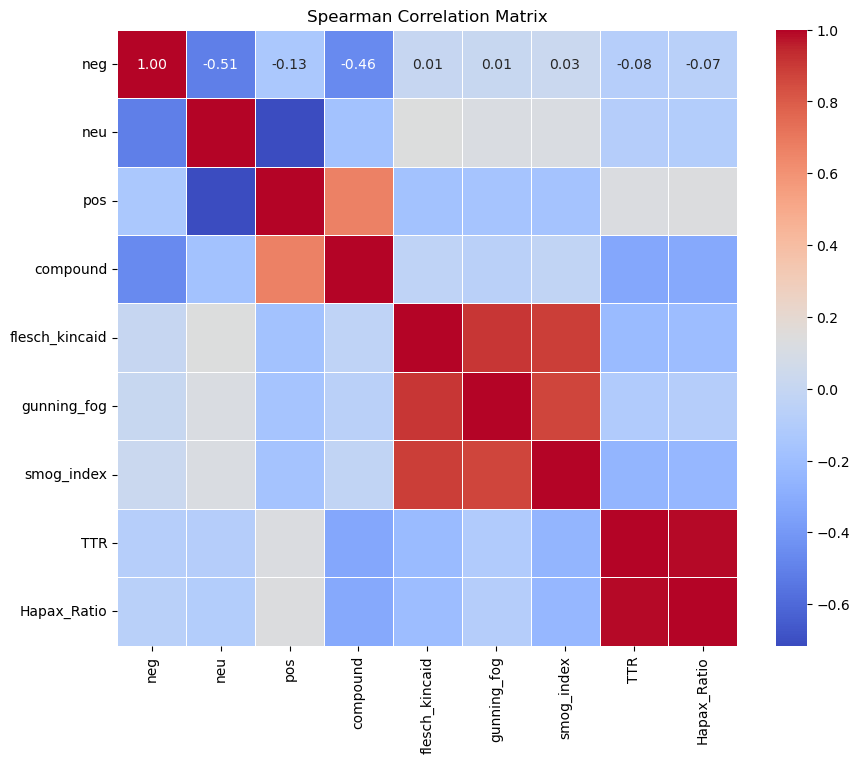

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of independent variables to check for correlation
independent_vars = ['neg', 'neu', 'pos', 'compound', 'flesch_kincaid', 'gunning_fog', 'smog_index', 'TTR', 'Hapax_Ratio']

# Calculate the Spearman correlation matrix for all independent variables
corr_matrix, _ = spearmanr(merged_df_2[independent_vars])

# Convert the correlation matrix into a DataFrame for better readability
corr_df = pd.DataFrame(corr_matrix, index=independent_vars, columns=independent_vars)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Spearman Correlation Matrix")
plt.show()


In [103]:
# Check for missing values
print(merged_df_2[independent_vars].isna().sum())
print(merged_df_2[independent_vars].dtypes)

neg               0
neu               0
pos               0
compound          0
flesch_kincaid    0
gunning_fog       0
smog_index        0
TTR               0
Hapax_Ratio       0
dtype: int64
neg               float64
neu               float64
pos               float64
compound          float64
flesch_kincaid    float64
gunning_fog       float64
smog_index        float64
TTR               float64
Hapax_Ratio       float64
dtype: object


In [105]:
# Calculate the Spearman correlation matrix
corr_matrix, _ = spearmanr(merged_df_2[independent_vars])

# Check the correlation matrix for NaN or invalid values
print(corr_matrix)


[[ 1.         -0.51204379 -0.13371409 -0.4636547   0.00598574  0.00989999
   0.02537097 -0.07917678 -0.06739769]
 [-0.51204379  1.         -0.7156511  -0.17455625  0.13941265  0.12187809
   0.12151819 -0.08727478 -0.09898263]
 [-0.13371409 -0.7156511   1.          0.66505575 -0.17860249 -0.1606324
  -0.16934034  0.12403008  0.13123425]
 [-0.4636547  -0.17455625  0.66505575  1.         -0.03686182 -0.06478359
  -0.02265363 -0.33171691 -0.31578815]
 [ 0.00598574  0.13941265 -0.17860249 -0.03686182  1.          0.90647924
   0.88786907 -0.22124913 -0.20700886]
 [ 0.00989999  0.12187809 -0.1606324  -0.06478359  0.90647924  1.
   0.8678876  -0.10687725 -0.08734518]
 [ 0.02537097  0.12151819 -0.16934034 -0.02265363  0.88786907  0.8678876
   1.         -0.25623577 -0.24249776]
 [-0.07917678 -0.08727478  0.12403008 -0.33171691 -0.22124913 -0.10687725
  -0.25623577  1.          0.98712865]
 [-0.06739769 -0.09898263  0.13123425 -0.31578815 -0.20700886 -0.08734518
  -0.24249776  0.98712865  1.   

In [95]:
# Convert the correlation matrix into a DataFrame for better readability
corr_df = pd.DataFrame(corr_matrix, index=independent_vars, columns=independent_vars)

# Display the summary statistics for the correlation matrix
print(f"Mean correlation: {corr_df.mean().mean():.4f}")
print(f"Standard deviation of correlation: {corr_df.stack().std():.4f}")

# Find the highest and lowest correlations (excluding the diagonal)
upper_triangle = corr_df.where(np.triu(np.ones(corr_df.shape), k=1).astype(bool))
highest_corr = upper_triangle.stack().idxmax(), upper_triangle.max().round(4)
lowest_corr = upper_triangle.stack().idxmin(), upper_triangle.min().round(4)

print(f"Highest correlation: {highest_corr[0]} with correlation = {highest_corr[1]}")
print(f"Lowest correlation: {lowest_corr[0]} with correlation = {lowest_corr[1]}")


Mean correlation: 0.1175
Standard deviation of correlation: 0.4849
Highest correlation: ('TTR', 'Hapax_Ratio') with correlation = neg                  NaN
neu              -0.5120
pos              -0.1337
compound          0.6651
flesch_kincaid    0.1394
gunning_fog       0.9065
smog_index        0.8879
TTR               0.1240
Hapax_Ratio       0.9871
dtype: float64
Lowest correlation: ('neu', 'pos') with correlation = neg                  NaN
neu              -0.5120
pos              -0.7157
compound         -0.4637
flesch_kincaid   -0.1786
gunning_fog      -0.1606
smog_index       -0.1693
TTR              -0.3317
Hapax_Ratio      -0.3158
dtype: float64


In [113]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming merged_df_cleaned contains your transformed independent variables
# Select the independent variables you want to calculate VIF for
independent_vars = ['neg', 'neu', 'pos', 'compound', 'flesch_kincaid', 'gunning_fog', 'smog_index', 'TTR', 'Hapax_Ratio']

# Add a constant column to the data (for the intercept term in the regression)
X = merged_df_2[independent_vars]
X = add_constant(X)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)


         Variable        VIF
0           const  94.938859
1             neg   7.952552
2             neu  19.421658
3             pos  18.461198
4        compound   3.877486
5  flesch_kincaid   7.350936
6     gunning_fog   6.697913
7      smog_index   3.770019
8             TTR  34.136676
9     Hapax_Ratio  34.239846


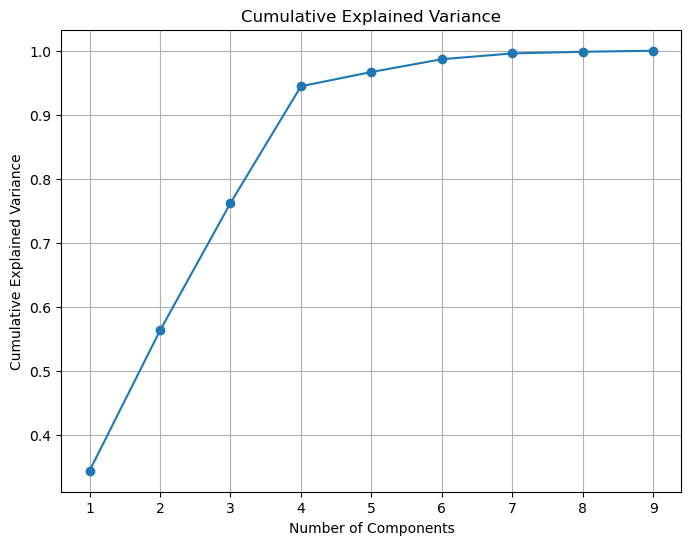

        PC1       PC2       PC3
0  1.119396 -0.173297  0.892987
1  2.018143  0.030754 -0.794043
2 -0.065220 -1.417400  0.070926
3 -1.185647 -1.905671 -1.366622
4  0.458325 -0.939176 -1.339309


In [115]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming merged_df_cleaned is your dataframe containing the transformed independent variables
independent_vars = ['neg', 'neu', 'pos', 'compound', 'flesch_kincaid', 'gunning_fog', 'smog_index', 'TTR', 'Hapax_Ratio']

# Step 1: Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(merged_df_2[independent_vars])

# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 3: Explained variance ratio (how much variance each component explains)
explained_variance = pca.explained_variance_ratio_

# Step 4: Plot the cumulative explained variance to decide how many components to keep
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Step 5: Select the number of components (e.g., retain components that explain 80% of variance)
n_components = 3  # Example: keep 3 components (this can vary based on your cumulative plot)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Step 6: View the principal components (new transformed dataset)
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
print(pca_df.head())


In [127]:
pca_df.head()
pca_df.tail()

,PC1,PC2,PC3
39639,2.637838,-0.006340,0.712630
39640,-1.497429,-0.527890,-1.394540
39641,-1.798598,-0.634147,0.375965
39642,2.399581,1.974940,0.135579
39643,-1.338961,-0.510878,2.726517


In [129]:
# Print the explained variance ratio for each principal component
print(pca.explained_variance_ratio_)


[0.3445691  0.21887288 0.19885398]


In [131]:
# Cumulative explained variance
print(pca.explained_variance_ratio_.cumsum())


[0.3445691  0.56344198 0.76229596]


In [137]:
merged_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           39644 non-null  int64  
 1   url                             39644 non-null  object 
 2    timedelta                      39644 non-null  float64
 3    n_tokens_title                 39644 non-null  float64
 4    n_tokens_content               39644 non-null  float64
 5    n_unique_tokens                39644 non-null  float64
 6    n_non_stop_words               39644 non-null  float64
 7    n_non_stop_unique_tokens       39644 non-null  float64
 8    num_hrefs                      39644 non-null  float64
 9    num_self_hrefs                 39644 non-null  float64
 10   num_imgs                       39644 non-null  float64
 11   num_videos                     39644 non-null  float64
 12   average_token_length           

In [145]:
from scipy.stats import spearmanr

# Initialize dictionary to store Spearman correlation results
spearman_results = {}

# Loop through all columns, but calculate Spearman correlation with 'shares' for each column
for col in merged_df_2.columns:
    if col != 'shares':  # Avoid calculating the correlation for 'shares' with itself
        corr, p_value = spearmanr(merged_df_2['shares'], merged_df_2[col])
        spearman_results[col] = (corr, p_value)

# Print the results
for var, (corr, p_value) in spearman_results.items():
    print(f"{var}: Spearman Correlation = {corr}, p-value = {p_value}")

#---  These are the significant variables from the Features from text content
#  ner_counts: Spearman Correlation = -0.01294152285159872, p-value = 0.009972322979918754
#  flesch_kincaid: Spearman Correlation = -0.015382589972575187, p-value = 0.0021921683556670054
#  gunning_fog: Spearman Correlation = -0.012420203259060798, p-value = 0.013399187890655207
# smog_index: Spearman Correlation = -0.013397421891061865, p-value = 0.00764020578124211

index: Spearman Correlation = -0.03206922544918986, p-value = 1.6952483908643252e-10
url: Spearman Correlation = -0.03206922544918986, p-value = 1.6952483908643252e-10
timedelta: Spearman Correlation = 0.032019179017579495, p-value = 1.8093388390418334e-10
n_tokens_title: Spearman Correlation = -0.040278201936068875, p-value = 1.0343295004259011e-15
n_tokens_content: Spearman Correlation = 0.009675150963278633, p-value = 0.054056393263260186
n_unique_tokens: Spearman Correlation = -0.04484214621000632, p-value = 4.1595345352510483e-19
n_non_stop_words: Spearman Correlation = 0.009646258574607174, p-value = 0.0547781838698799
n_non_stop_unique_tokens: Spearman Correlation = -0.07070573858757861, p-value = 4.060485839353601e-45
num_hrefs: Spearman Correlation = 0.09001508876856178, p-value = 4.1085992341948324e-72
num_self_hrefs: Spearman Correlation = 0.03750254041793133, p-value = 8.053180276642567e-14
num_imgs: Spearman Correlation = 0.0831142953944779, p-value = 1.0239849318543847e-6

In [143]:
# Strip any leading/trailing spaces from column names
merged_df_2.columns = merged_df_2.columns.str.strip()

# Check the columns again
print(merged_df_2.columns)


Index(['index', 'url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_word

## Feature Engineering (Original variables)

In [60]:
import pandas as pd
df = pd.read_csv("merged_df_3.csv")

In [61]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,pos,compound,flesch_kincaid,gunning_fog,smog_index,TTR,Hapax_Ratio,PC1,PC2,PC3
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100,0.9224,12.2,13.61,14.2,0.661692,0.527363,1.021973,-0.361545,1.174997
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.053,0.9081,11.9,14.29,14.0,0.591667,0.445833,1.943497,-0.997453,0.097227
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.150,0.9827,10.4,11.85,12.1,0.578035,0.433526,-0.045281,-1.111920,0.572418
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.157,0.9977,8.1,9.63,10.1,0.488889,0.351893,-0.981055,-1.714765,-0.763565
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.092,0.9697,9.5,11.22,12.7,0.536496,0.368613,0.554001,-1.441596,-0.718638


In [62]:
# Removing Space Character from Feature names (again)
df.columns = df.columns.str.replace(' ', '')

In [63]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [64]:
df['ner_counts']

0        {'ORG': 8, 'DATE': 3, 'WORK_OF_ART': 2, 'GPE':...
1        {'ORG': 12, 'PERSON': 2, 'DATE': 3, 'GPE': 1, ...
2        {'DATE': 9, 'ORG': 7, 'PERSON': 3, 'FAC': 1, '...
3        {'ORG': 19, 'PERSON': 1, 'NORP': 6, 'FAC': 8, ...
4        {'GPE': 2, 'ORG': 15, 'CARDINAL': 1, 'DATE': 2...
                               ...                        
39639    {'ORG': 10, 'WORK_OF_ART': 2, 'PERCENT': 1, 'C...
39640    {'GPE': 4, 'ORG': 3, 'PERSON': 5, 'WORK_OF_ART...
39641    {'WORK_OF_ART': 1, 'ORG': 2, 'GPE': 1, 'PERSON...
39642    {'NORP': 13, 'DATE': 18, 'CARDINAL': 5, 'TIME'...
39643    {'QUANTITY': 1, 'GPE': 1, 'DATE': 2, 'CARDINAL...
Name: ner_counts, Length: 39644, dtype: object

### Exploratory Data Analysis

In [65]:
df.describe() 


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,pos,compound,flesch_kincaid,gunning_fog,smog_index,TTR,Hapax_Ratio,PC1,PC2,PC3
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,3.964400e+04,3.964400e+04,3.964400e+04
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.108555,0.571706,10.365226,11.446184,12.181672,0.601265,0.455091,5.735387e-18,-3.441232e-17,2.867693e-18
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.056332,0.675005,2.243287,2.169118,2.149192,0.123980,0.133412,1.755424e+00,1.390514e+00,1.339438e+00
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.999900,0.500000,0.800000,0.000000,0.134082,0.000000,-1.394059e+01,-3.391938e+00,-5.393579e+00
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.069000,0.535475,8.900000,10.050000,11.100000,0.511672,0.357843,-1.060378e+00,-9.776619e-01,-9.007623e-01
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.101000,0.936450,10.300000,11.370000,12.200000,0.590235,0.435583,1.460649e-01,-4.501049e-01,-1.028451e-01
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.139000,0.986000,11.700000,12.740000,13.400000,0.685083,0.536458,1.168156e+00,5.765766e-01,7.890549e-01
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,0.750000,1.000000,55.700000,54.760000,30.800000,1.000000,1.000000,2.421171e+01,9.726437e+00,1.824336e+01


From the data, there will be need to normailze the data if their will be need for condersing any machine learning model.

In [66]:
df.dtypes

url                  object
timedelta           float64
n_tokens_title      float64
n_tokens_content    float64
n_unique_tokens     float64
                     ...   
TTR                 float64
Hapax_Ratio         float64
PC1                 float64
PC2                 float64
PC3                 float64
Length: 74, dtype: object

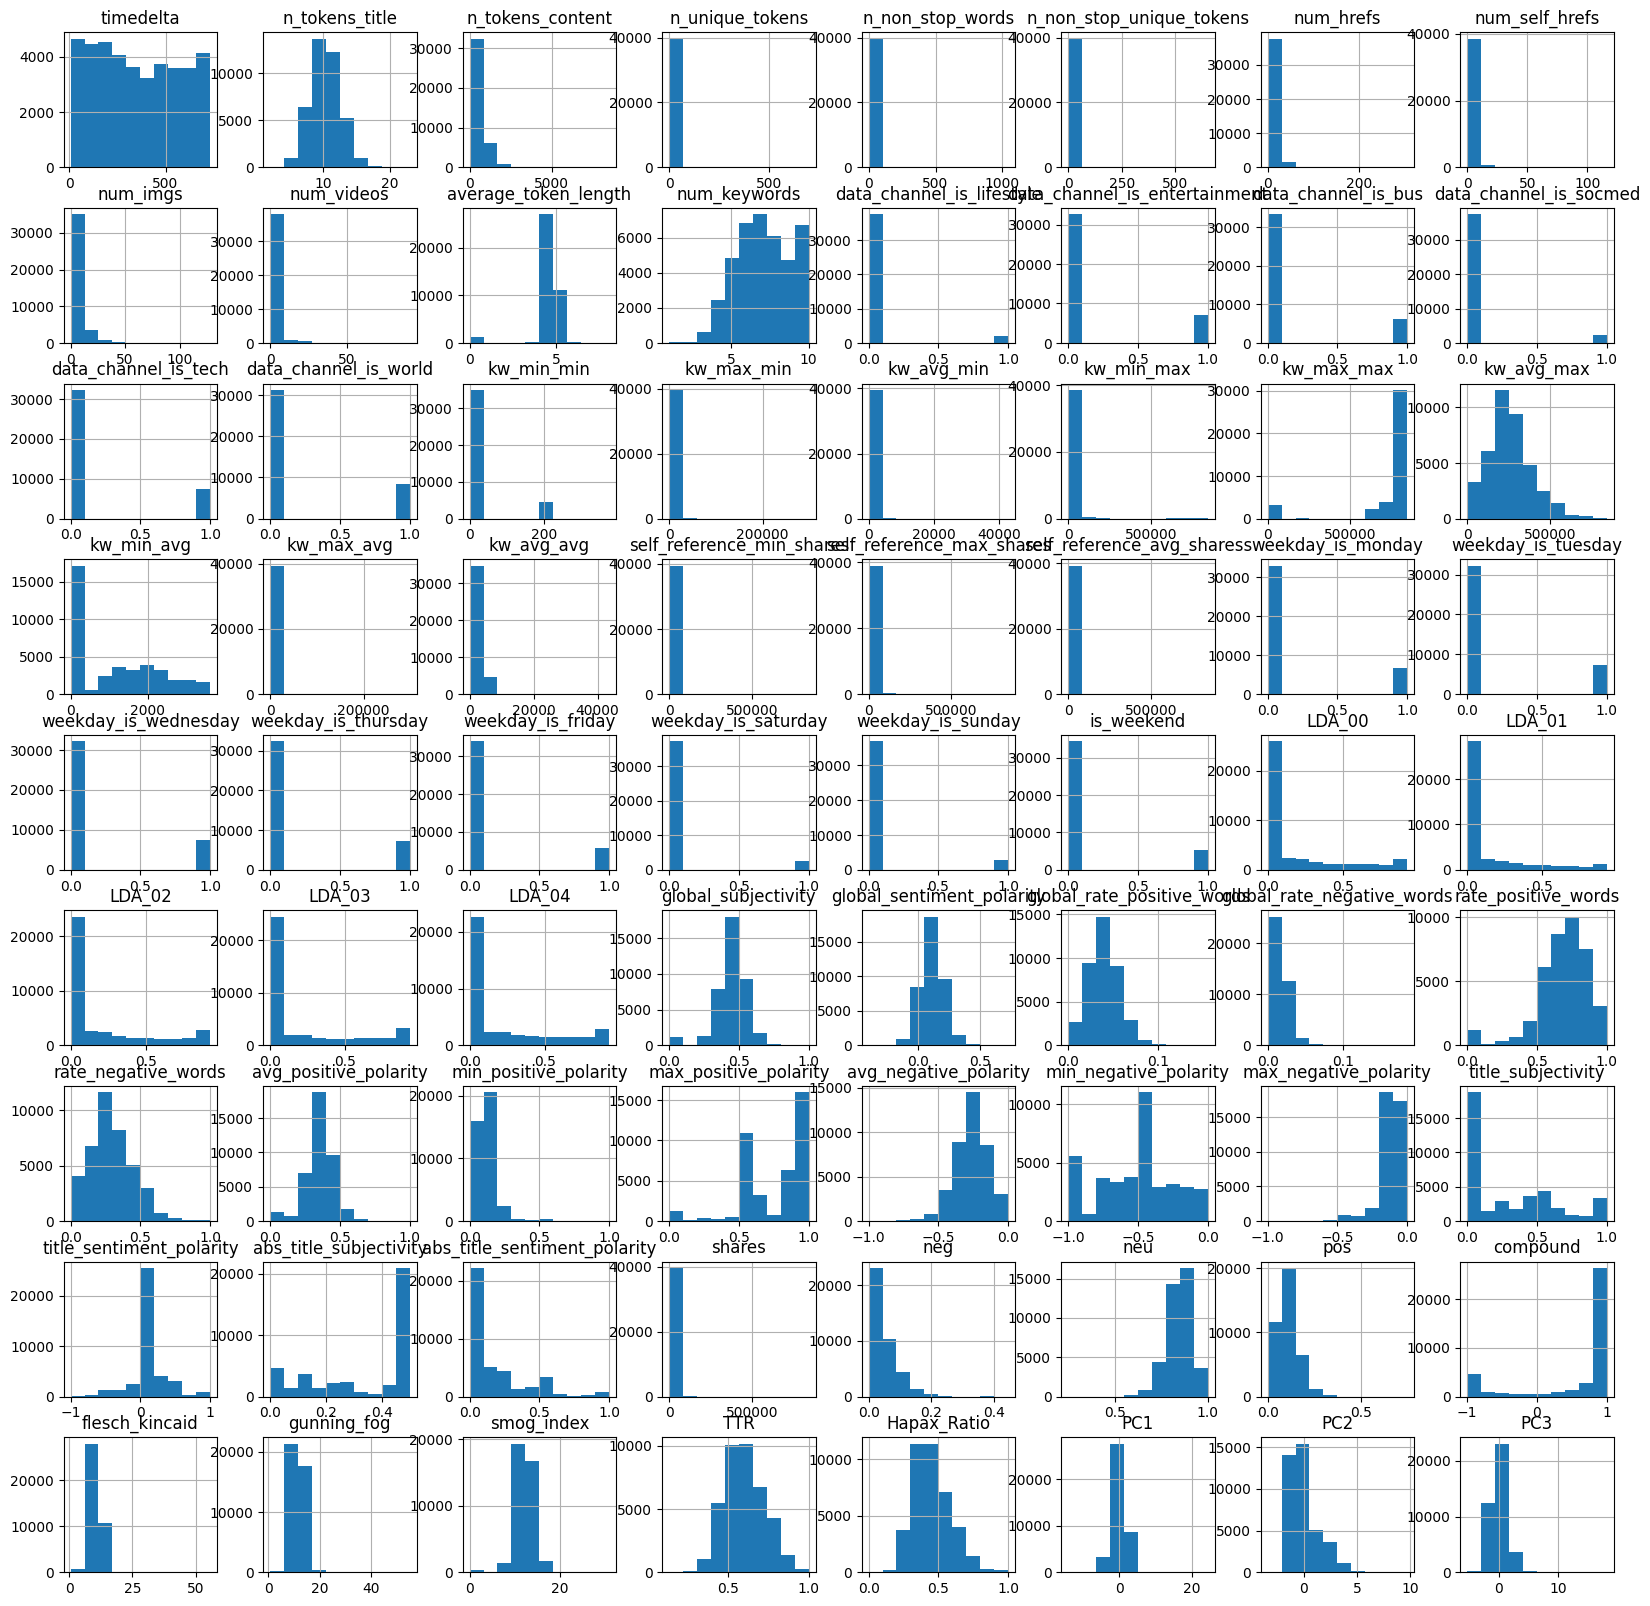

In [18]:
df.hist(figsize=(20,20))
plt.show()

In [67]:
# n_tokens_content represents Number of words in the content
# However its minimum value to be 0. Means that there are articles that do not have any content.
# Such records should be dropped as their related attributes add no meaning to our analysis

# find number of rows that contain 0 for n_tokens_content
num_of_nowords=df[df['n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)

number of news items with no words 1181


In [68]:
# Drop these items or rows with n_tokens_content = 0

df = df[df['n_tokens_content'] != 0]

In [69]:
# Since URL is a non-numeric attribute and will not add value to our analysis so dropping it from the dataset
# Also timedelta is a non-predictive attribute and not a feature of the data set so we can drop it from the dataset
# Drop highly correlated attributes "n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"
df = df.drop('url',axis=1)
df = df.drop('timedelta',axis=1)
df= df.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

In [70]:
df = df.drop(['neg', 'neu','pos', 'compound', 'flesch_kincaid', 'gunning_fog', 'smog_index', 'TTR','Hapax_Ratio'], axis=1)

In [71]:
# # Here we drop the two non-preditive (url and timedelta) attributes. They won't contribute anything
# df.drop(labels=['url','timedelta'], axis = 1, inplace=True)
# df.head(n=4)
# # remove noise from n_tokens_content. those equals to 0
# num_of_nowords=df[df['n_tokens_content']==0].index
# print('number of news items with no words',num_of_nowords.size)
# df  = df[df['n_tokens_content'] != 0]
# # Comment - Visualizing the n_non_stop_words data field shows that the present of a record with 1042 value, 
# # futher observation of that data shows that it belongs to entertainment which is not actually. It belongs to world news or others.
# # this particluar also contains 0 on a lot of attributes. This record is classifed as a noise and will be remove.
# df = df[df['n_non_stop_words'] != 1042]
# # Here, we will go ahead and drop the field of ' n_non_stop_words. It doesn't contain relaible information.
# df.drop(labels=['n_non_stop_words'], axis = 1, inplace=True)

In [72]:
df['shares'].head()

0     593
1     711
2    1500
3    1200
4     505
Name: shares, dtype: int64

In [73]:
df.shape

(38463, 60)

In [74]:
df.iloc[:,55]

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name: shares, Length: 38463, dtype: int64

In [75]:
# Colocar la variabe shares como la ultima columna para mayor comodidad
column61 = df.iloc[:,55]

df = df.drop(df.columns[55], axis=1)

df['shares'] = column61
df['shares'].head()

0     593
1     711
2    1500
3    1200
4     505
Name: shares, dtype: int64

In [76]:
# # Colocar la variabe shares como la ultima columna
# column59 = df.iloc[:,58]

# df = df.drop(df.columns[58], axis=1)

# df['shares'] = column59 
# df['shares'].head()

In [77]:
# Understanding target variable distribution
df['shares'].describe()

count     38463.000000
mean       3355.360398
std       11585.968776
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64

In [78]:
df['shares'].median()

np.float64(1400.0)

Hence, to set a threshold for deciding whether an article is popular, I choose the median number of shares in the dataset. All the articles with 1400 or more shares are marked as popular and all the articles with less than 1400 shares are considered to be unpopular

In [79]:
# Create a new target variable
df['popularity'] = df['shares'].apply(lambda x: 0 if x <1400 else 1)

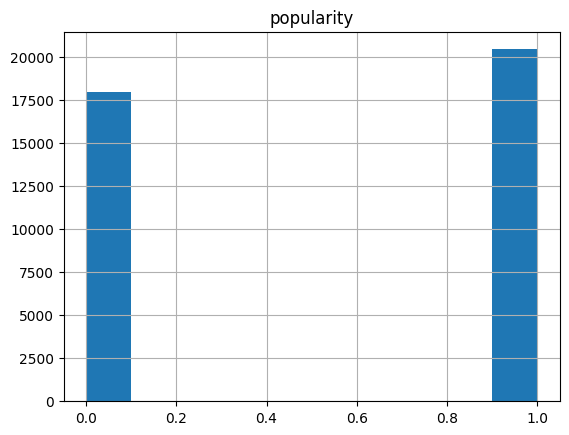

In [80]:
df.hist(column='popularity')
plt.show()

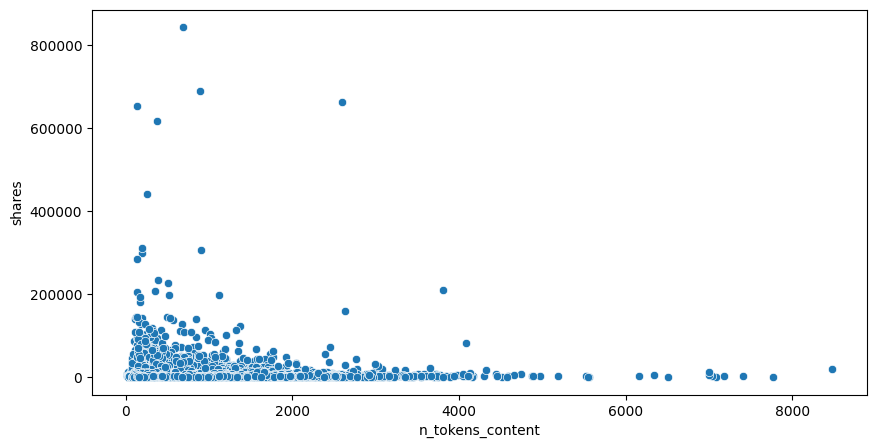

In [81]:
# Number of words in content vs Number of shares

plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_content', data=df)

C:\Users\sebas\AppData\Local\Temp\ipykernel_14604\4010705382.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(y='shares', x='n_tokens_title', data=df,palette='muted')


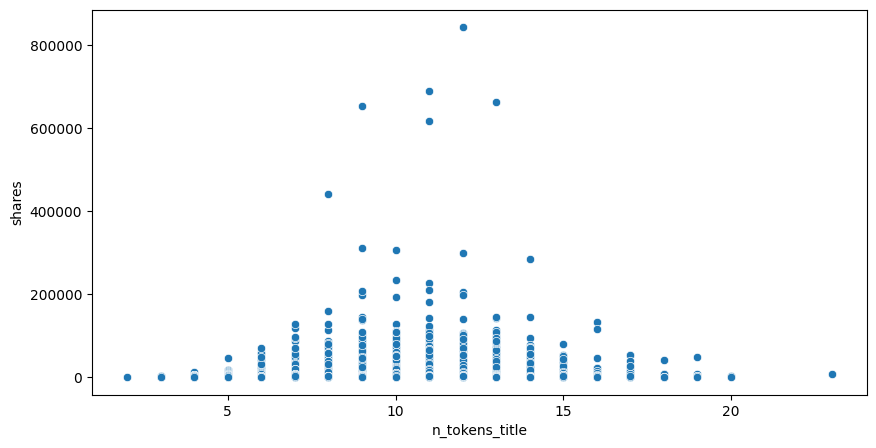

In [82]:
# Number of words in title vs Number of shares

plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_title', data=df,palette='muted')

In [83]:
a,b = df['shares'].mean(),df['shares'].median()
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

Mean article shares = 3355.3603983048642
Median article share = 1400.0


In [84]:
Wday = df.columns.values[26:34]
Wday

array(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend'], dtype=object)

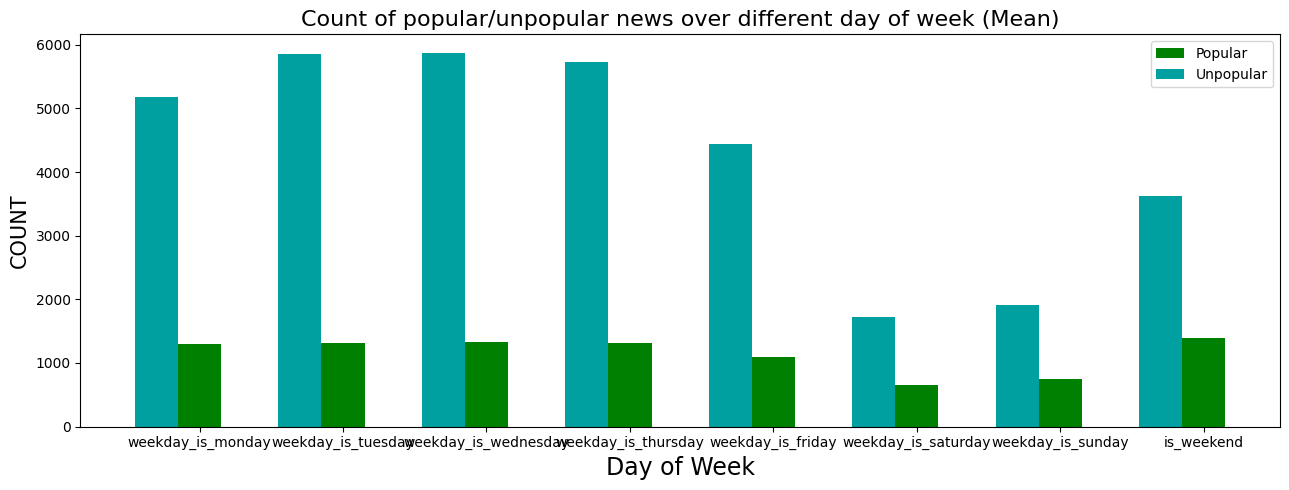

In [85]:
Unpop=df[df['shares']<a]
Pop=df[df['shares']>=a]
Unpop_day = Unpop[Wday].sum().values
Pop_day = Pop[Wday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Wday)),Wday)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)
#for i, v in enumerate(Pop_day):
#    fig.text(i+25, 
#              v/Pop_day[i]+50, 
#              Pop_day[i], 
#              fontsize=5)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

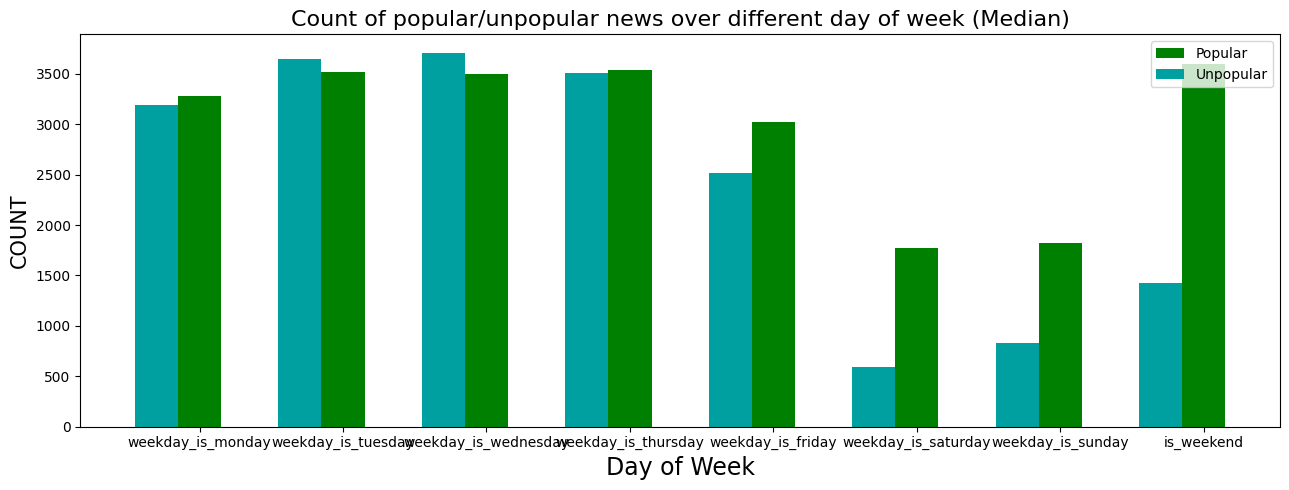

In [86]:
Unpop=df[df['shares']<b]
Pop=df[df['shares']>=b]
Unpop_day = Unpop[Wday].sum().values
Pop_day = Pop[Wday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Wday)),Wday)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)
#for i, v in enumerate(Pop_day):
#    fig.text(i+25, 
#              v/Pop_day[i]+50, 
#              Pop_day[i], 
#              fontsize=5)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [87]:
Dc=df.columns[9:15]
Dc

Index(['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')

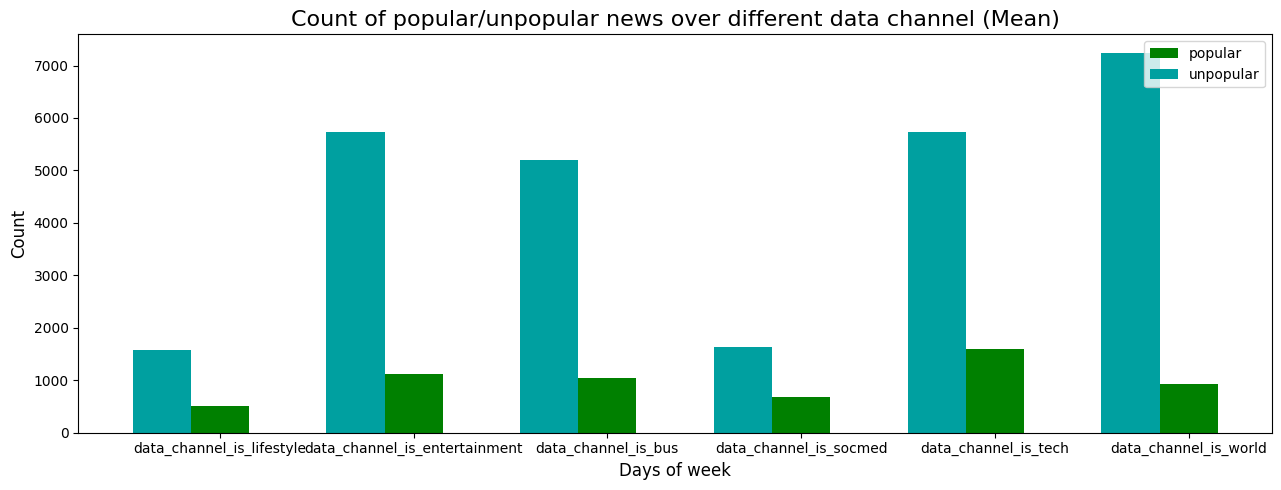

In [88]:
Unpop3=df[df['shares']<a]
Pop3=df[df['shares']>=a]
Unpop_day3 = Unpop3[Dc].sum().values
Pop_day3 = Pop3[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day3, width = 0.3, align="center", color = 'g', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = '#00A0A0', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

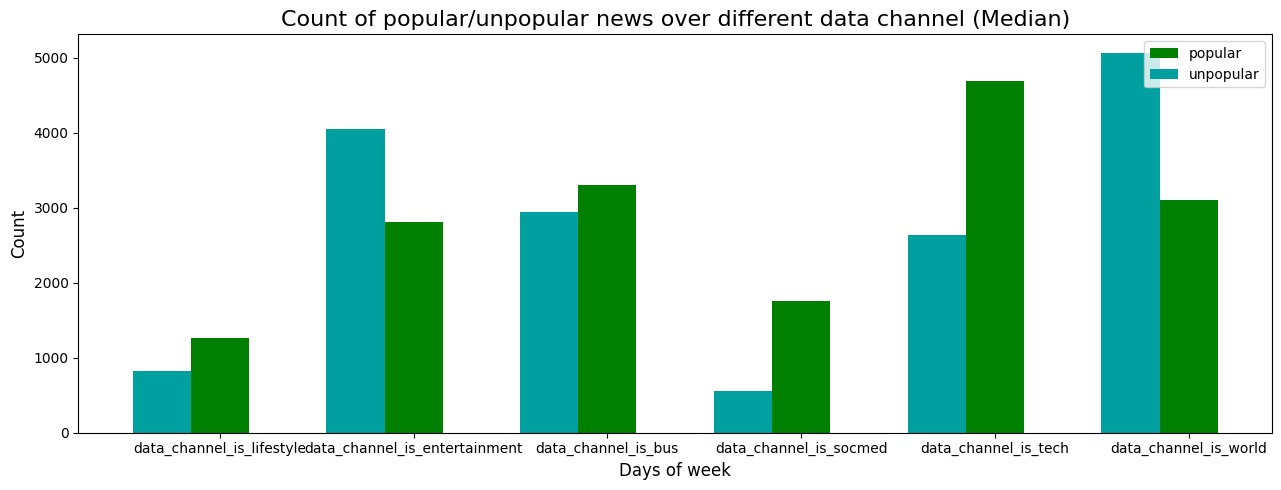

In [89]:
Unpop4=df[df['shares']<b]
Pop4=df[df['shares']>=b]
Unpop_day4 = Unpop4[Dc].sum().values
Pop_day4 = Pop4[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Median)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day4, width = 0.3, align="center", color = 'g', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day4, width = 0.3, align = "center", color = '#00A0A0', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

### Outlier Treatment

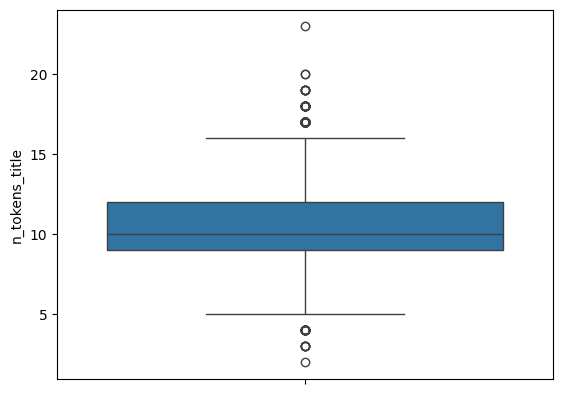

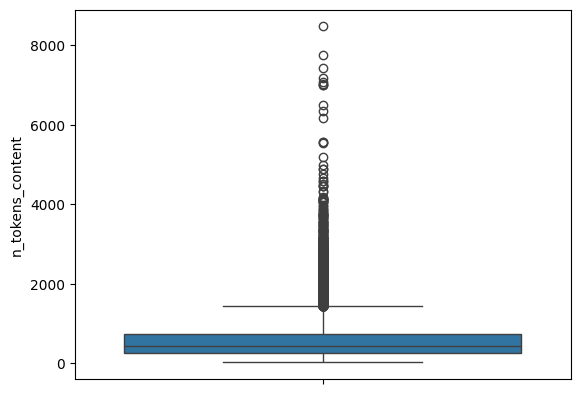

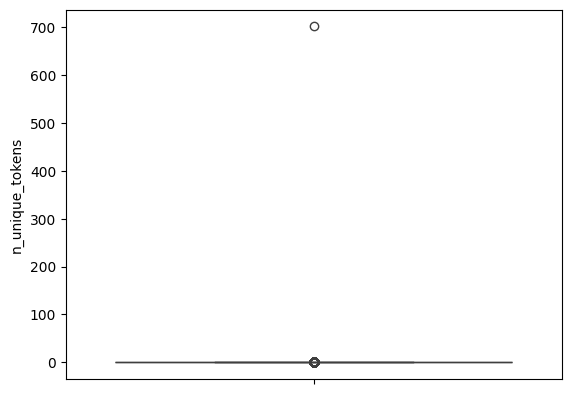

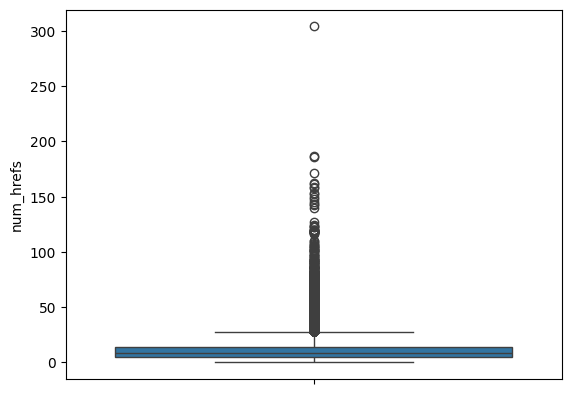

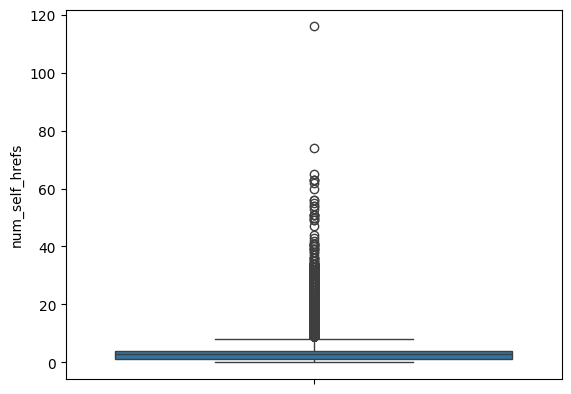

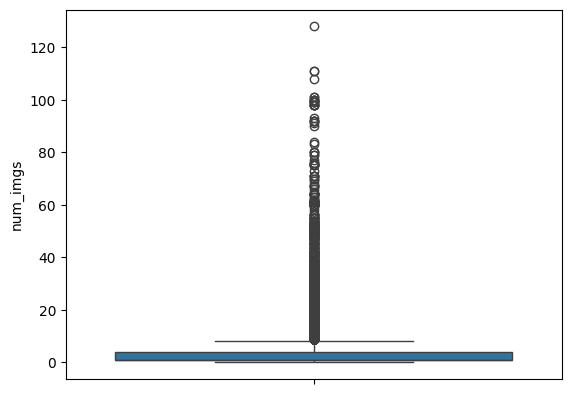

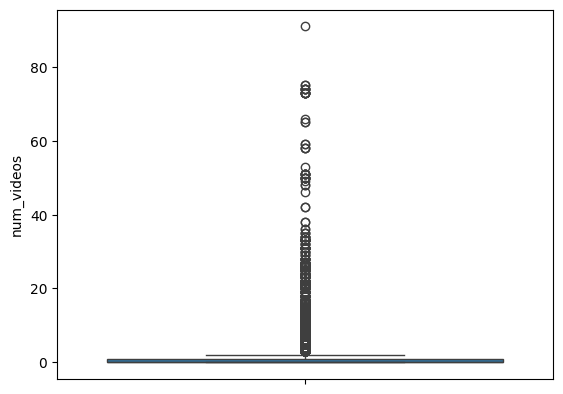

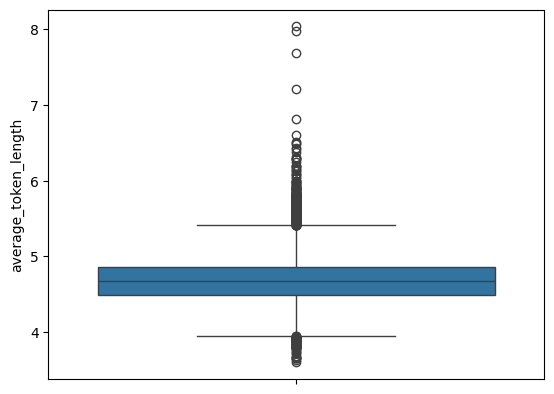

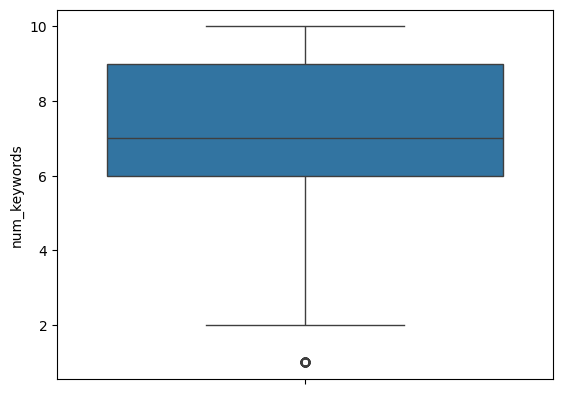

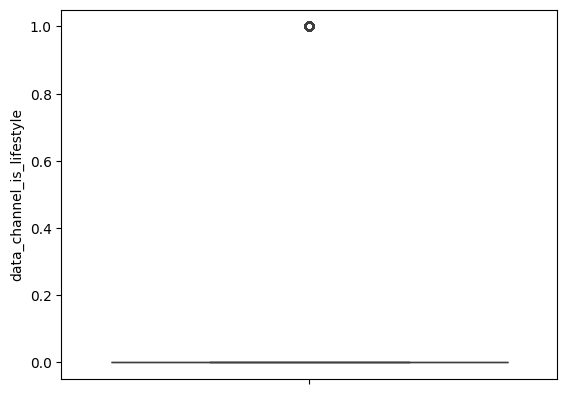

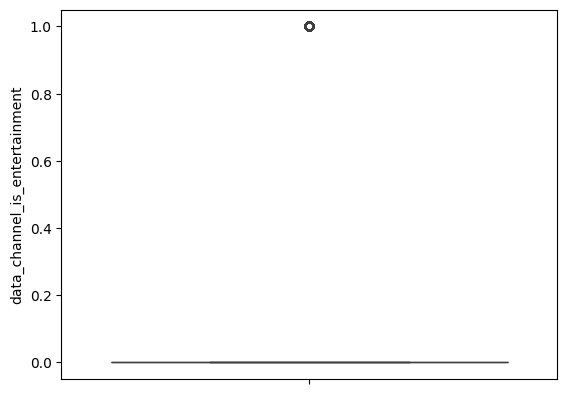

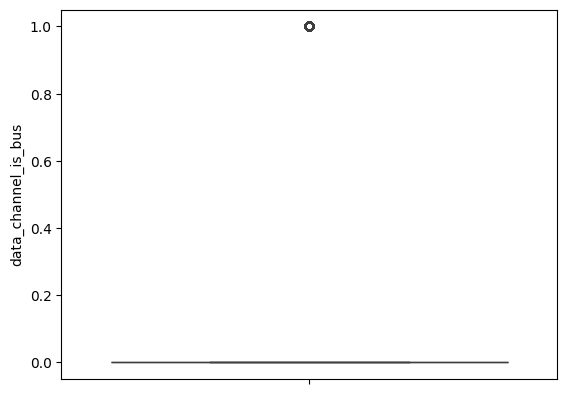

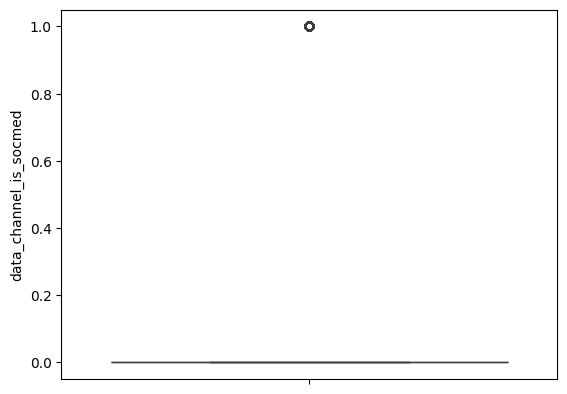

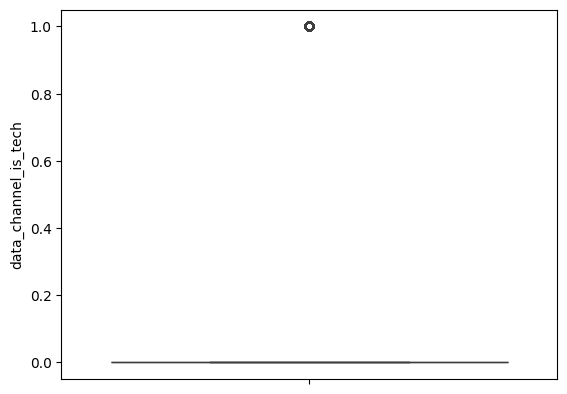

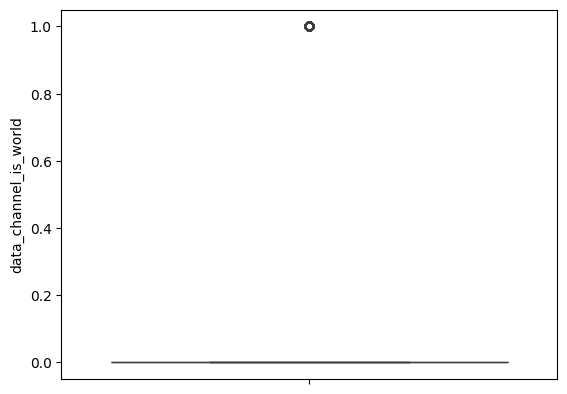

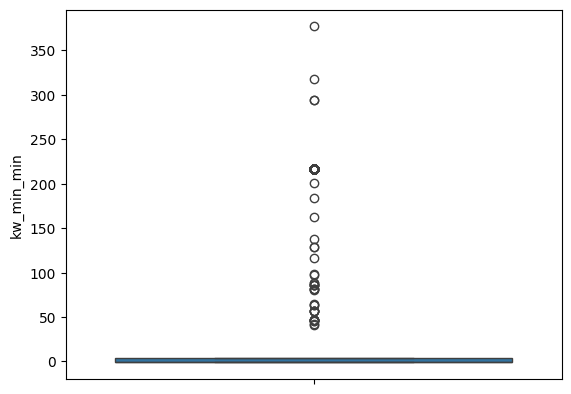

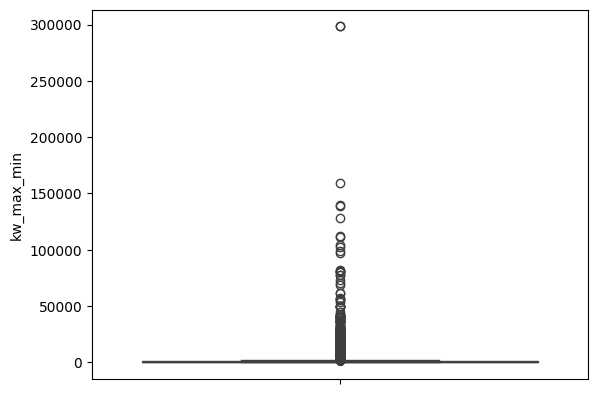

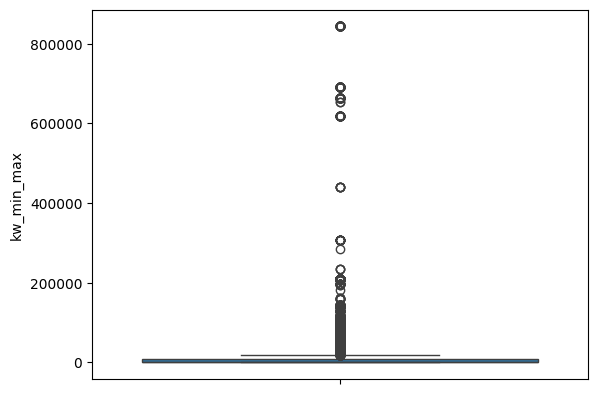

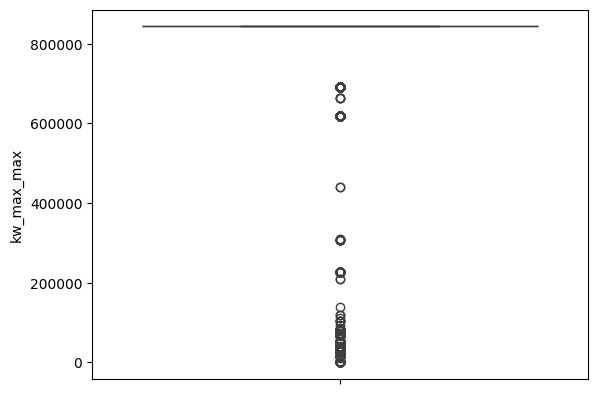

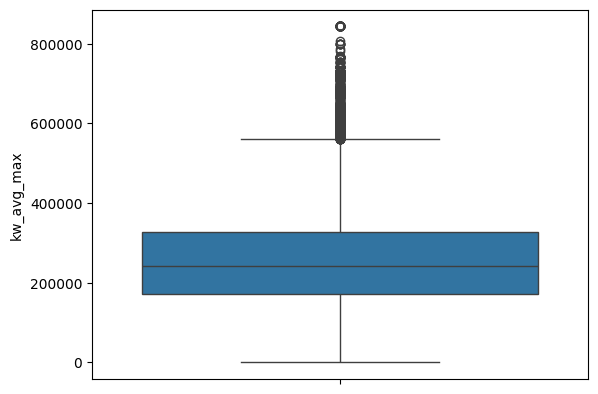

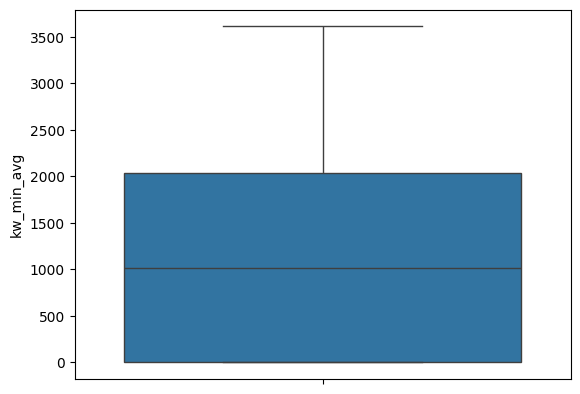

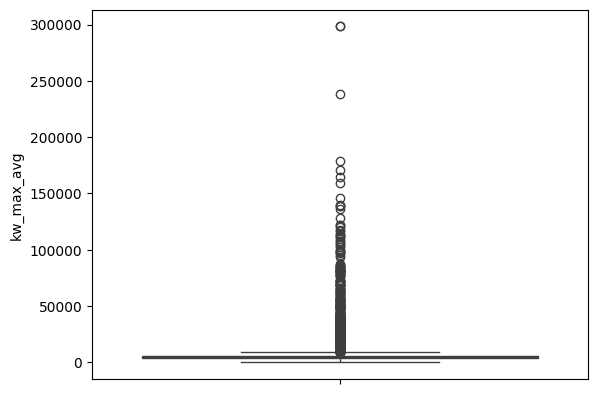

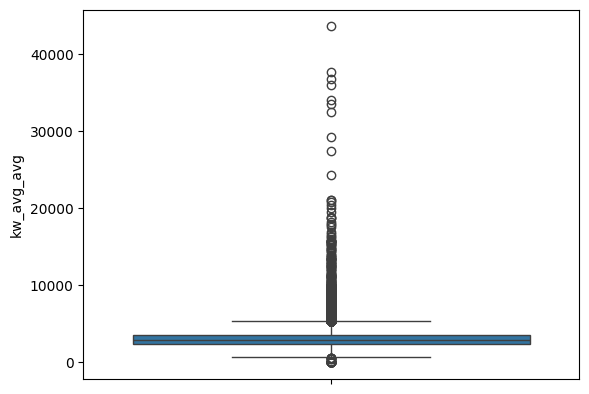

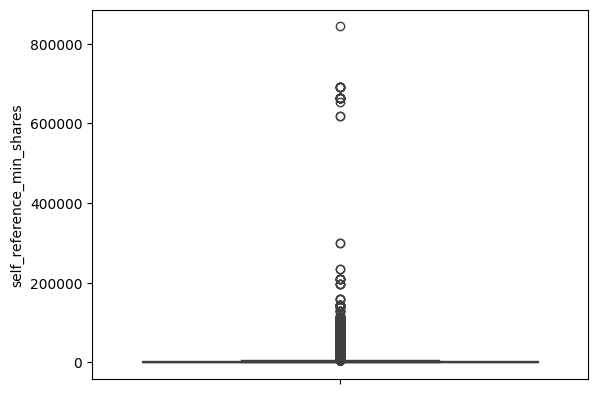

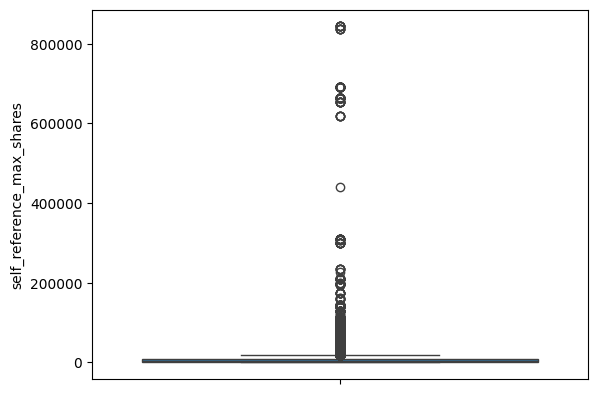

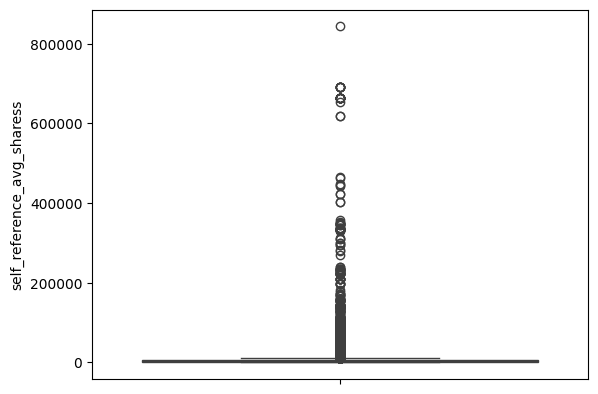

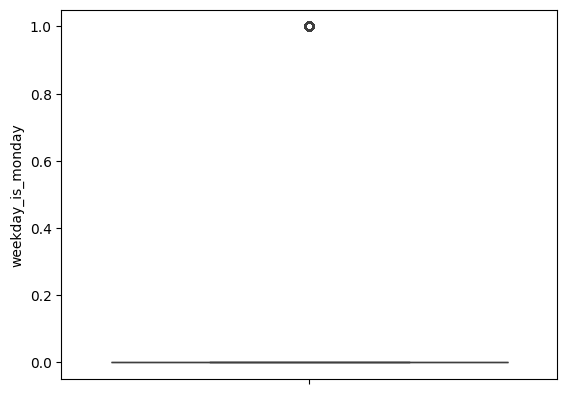

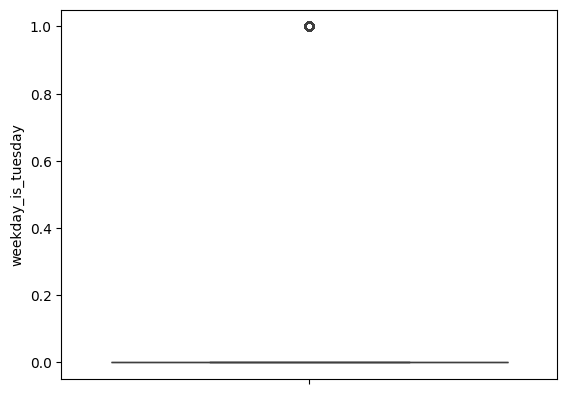

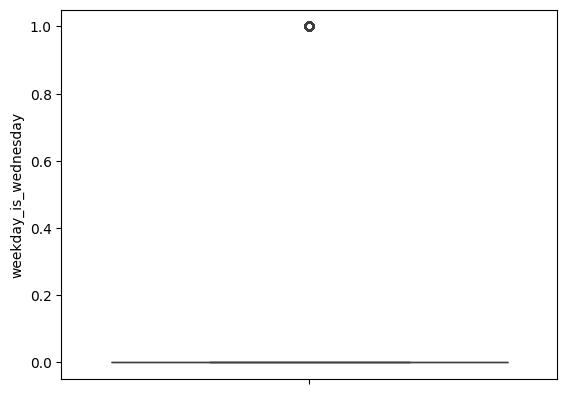

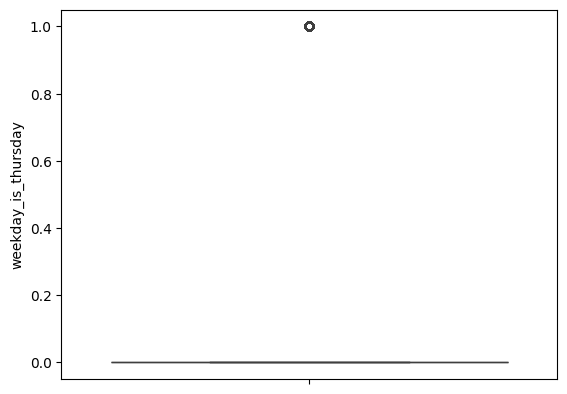

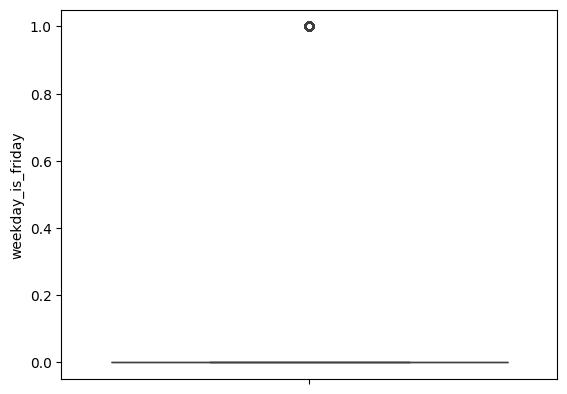

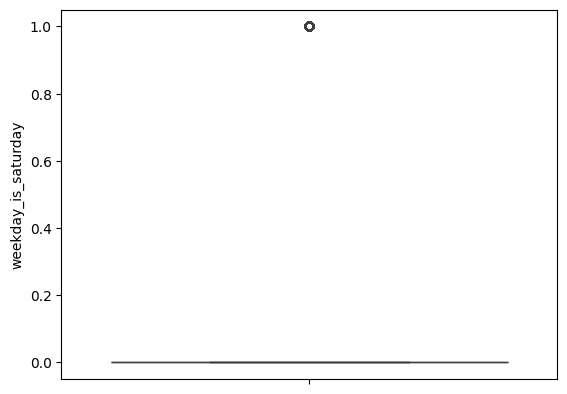

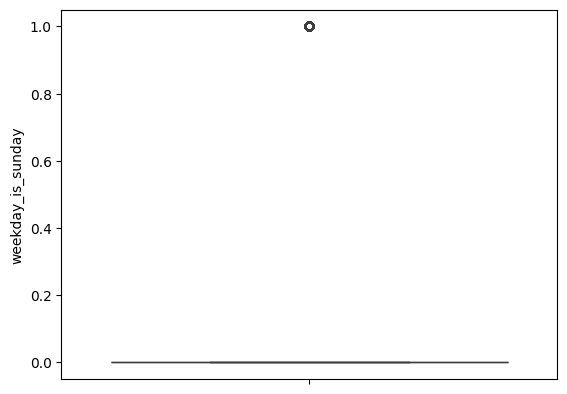

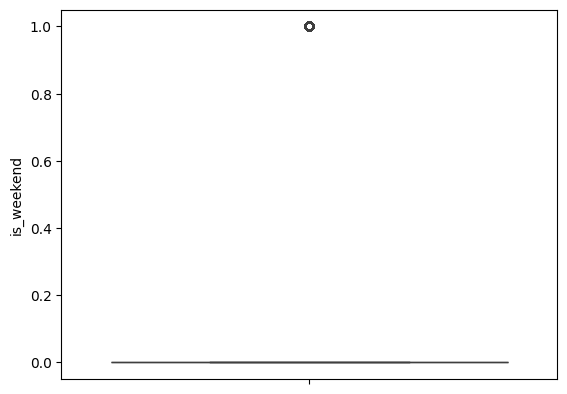

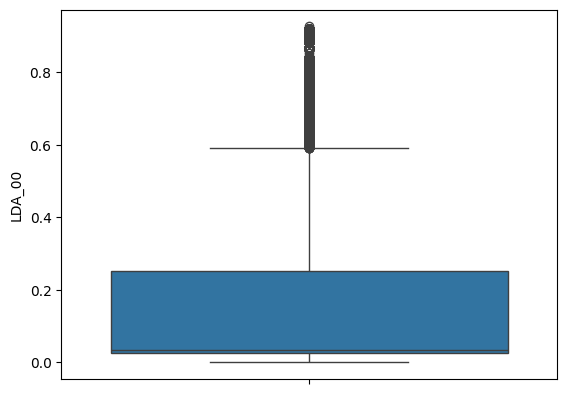

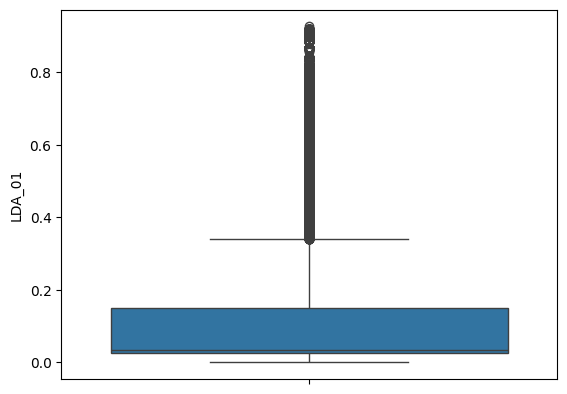

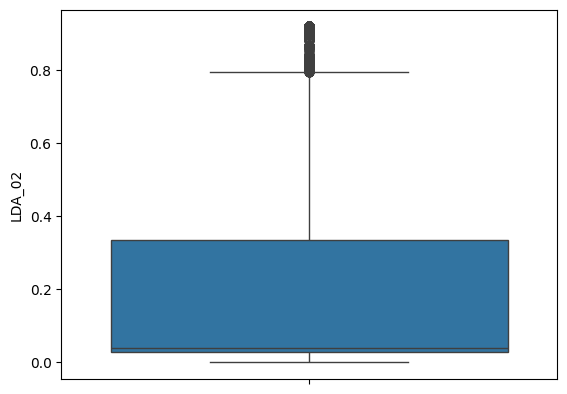

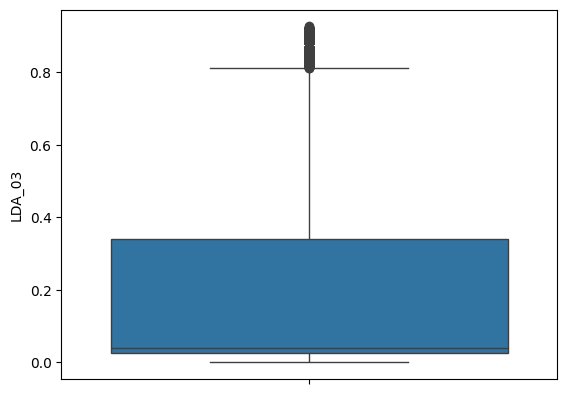

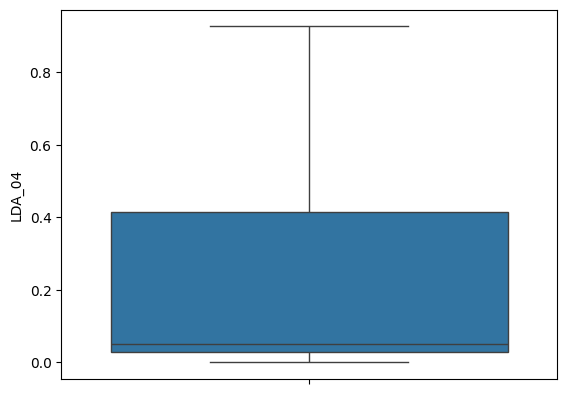

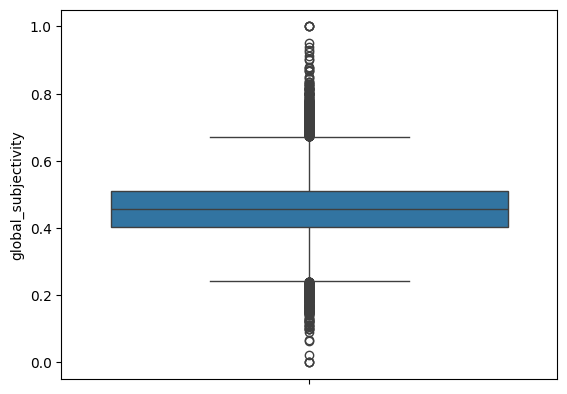

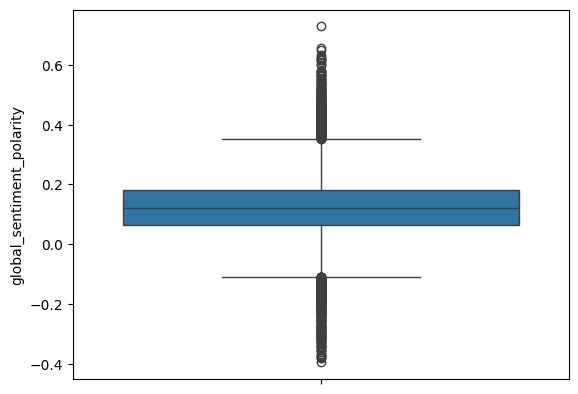

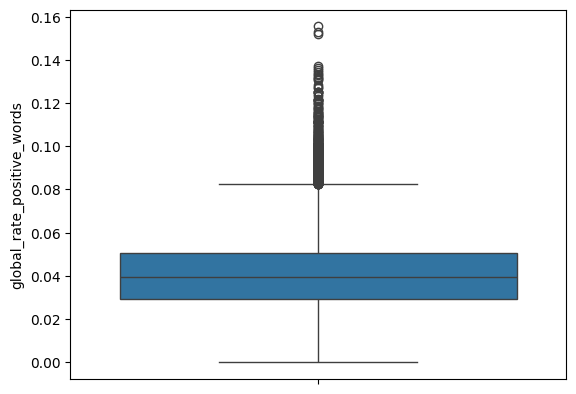

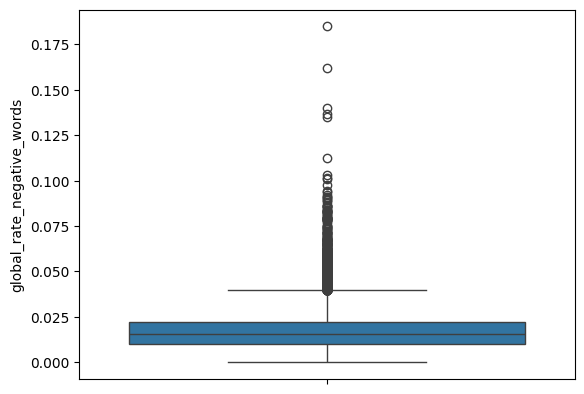

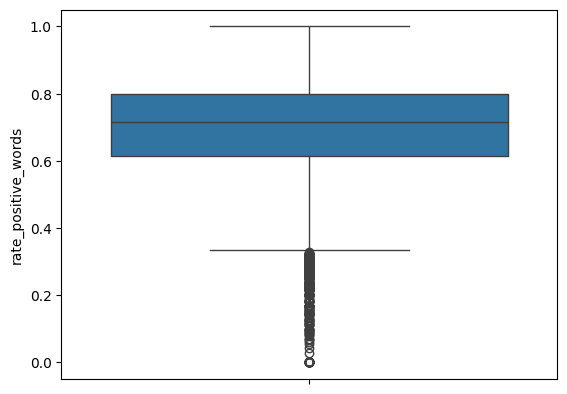

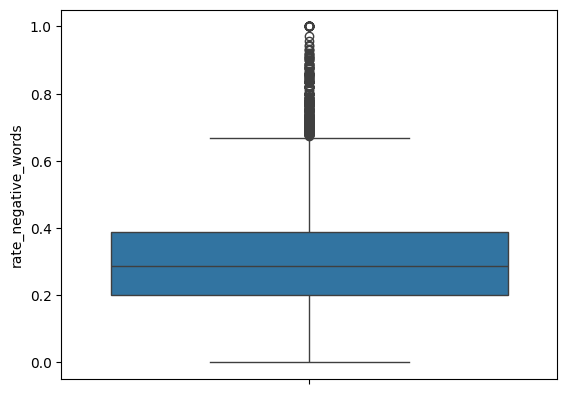

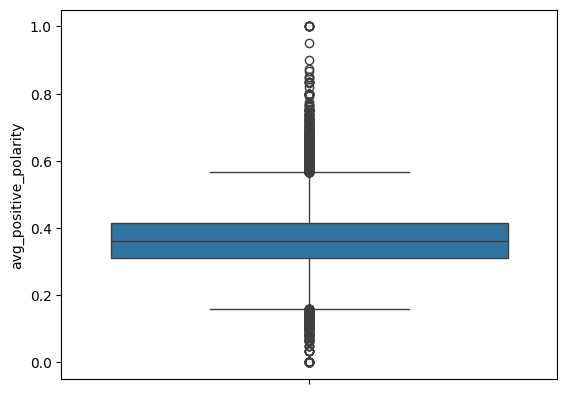

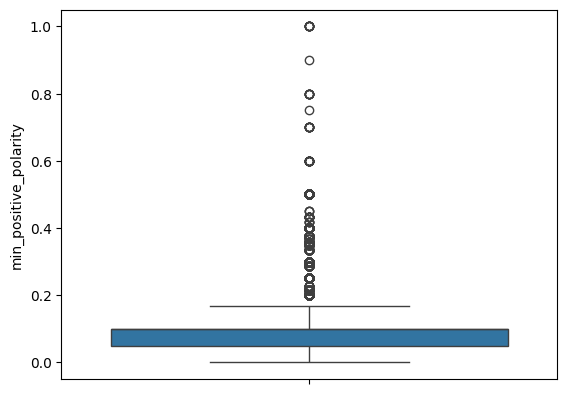

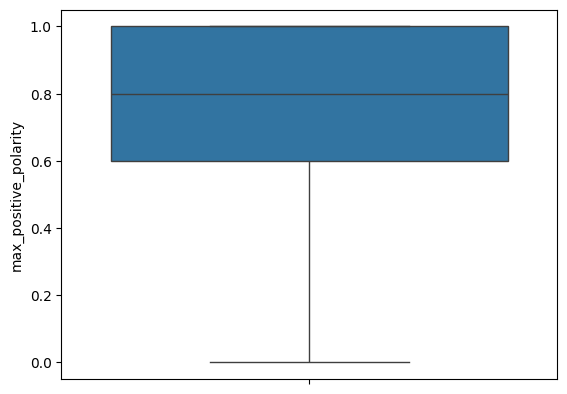

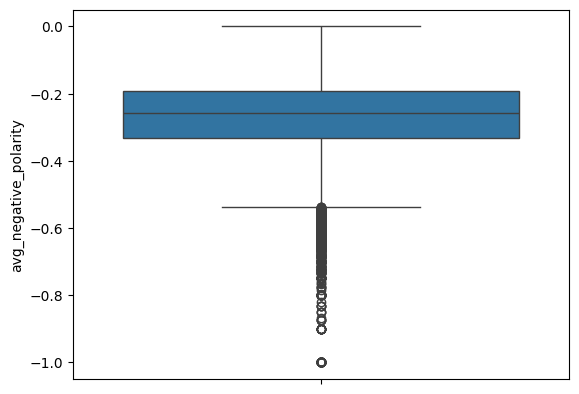

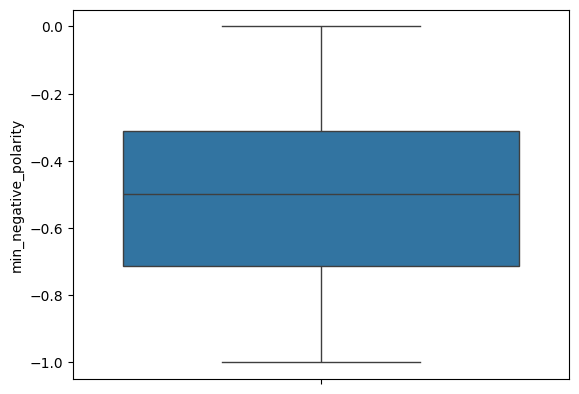

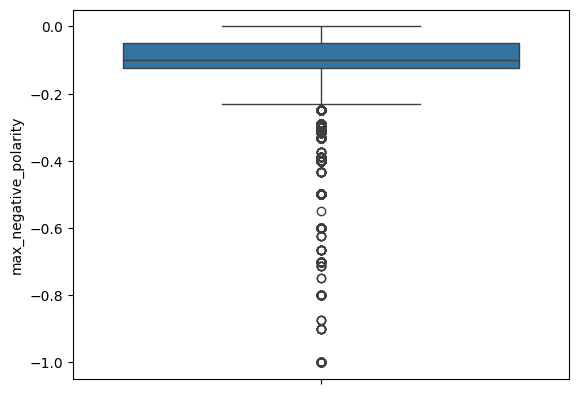

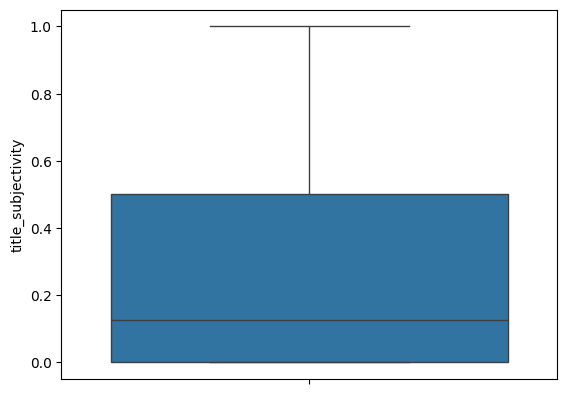

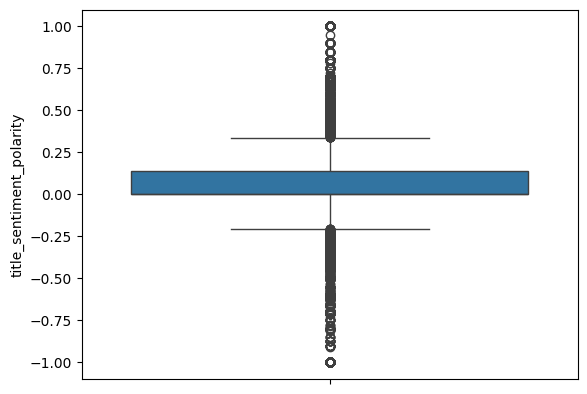

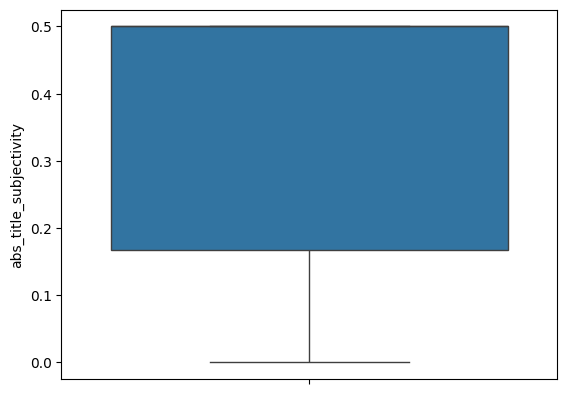

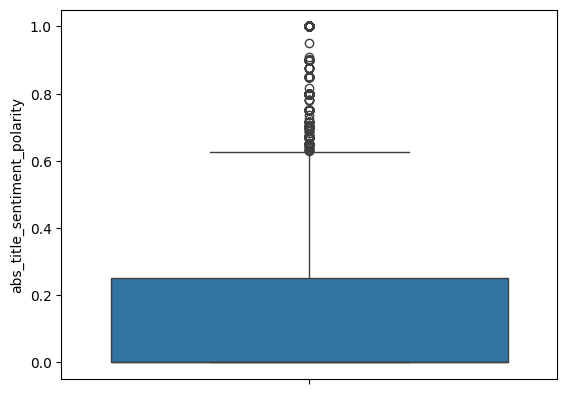

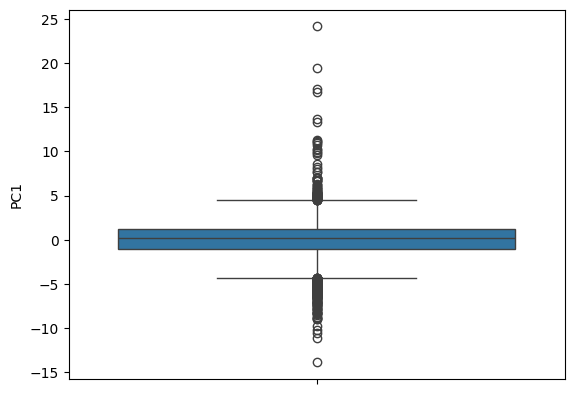

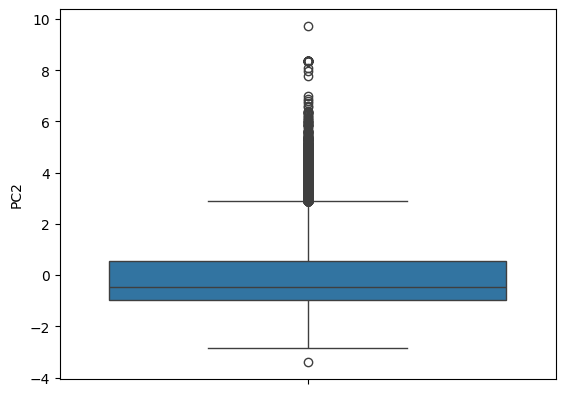

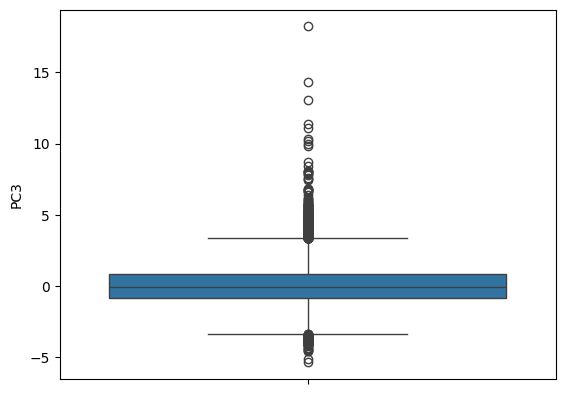

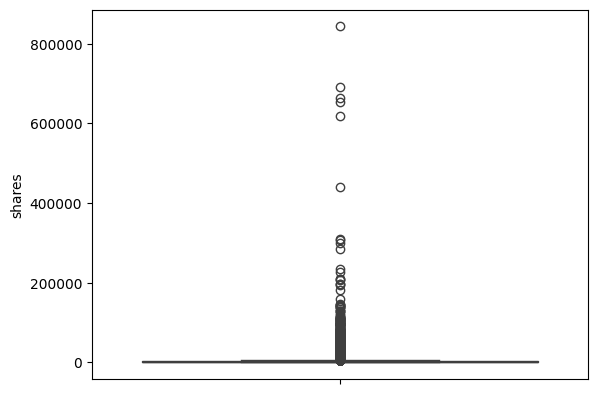

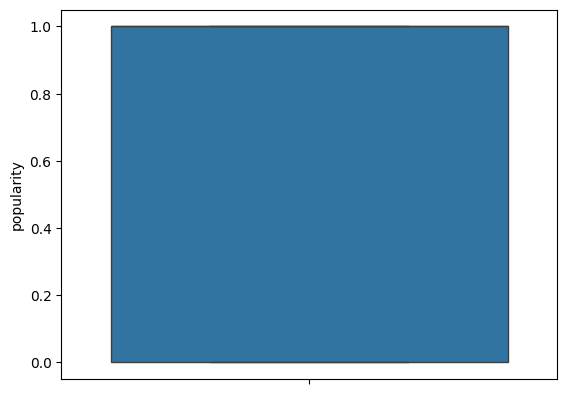

In [90]:
num_cols = df.select_dtypes(['int64','float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(df[num_cols[i]])
    plt.show()

In [91]:
for column in num_cols:    
    q1 = df[column].quantile(0.25)    # First Quartile
    q3 = df[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df[(df[column] < llimit) | (df[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 155
4.5
16.5
3.0
Number of outliers in "n_tokens_content" : 1875
-446.0
1434.0
470.0
Number of outliers in "n_unique_tokens" : 490
0.27688172230725006
0.8116487408852499
0.13369175464449995
Number of outliers in "num_hrefs" : 2636
-8.5
27.5
9.0
Number of outliers in "num_self_hrefs" : 2090
-3.5
8.5
3.0
Number of outliers in "num_imgs" : 7466
-3.5
8.5
3.0
Number of outliers in "num_videos" : 2939
-1.5
2.5
1.0
Number of outliers in "average_token_length" : 552
3.9477737410249993
5.410377035785
0.36565082369000024
Number of outliers in "num_keywords" : 50
1.5
13.5
3.0
Number of outliers in "data_channel_is_lifestyle" : 2077
0.0
0.0
0.0
Number of outliers in "data_channel_is_entertainment" : 6856
0.0
0.0
0.0
Number of outliers in "data_channel_is_bus" : 6235
0.0
0.0
0.0
Number of outliers in "data_channel_is_socmed" : 2311
0.0
0.0
0.0
Number of outliers in "data_channel_is_tech" : 7325
0.0
0.0
0.0
Number of outliers in "data_channel_is_world" : 8168

We can remove this ouliers after applying transformation

### Scaling of Dataset

In [126]:
# df2_num  dataframe contains numerical feaures.

df2_num=df.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",                  
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"],axis=1)

# df2_cat dataframe contains catagoricl features.

df2_cat=df[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",            
             "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world", "ner_counts"]]

df2_componentes=df[['PC1', 'PC2', 'PC3']]

In [93]:
df2_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'ner_counts', 'PC1', 'PC2', 'PC3',
       'shares', 'popularity'],
      dtype='ob

In [ ]:
# We will check distribution of attributes to decide the method of scaling

# Drop target variable from df2_num
df2_num = df2_num.drop('shares',axis=1)
df2_num = df2_num.drop(['PC1', 'PC2', 'PC3'],axis=1)
df2_num = df2_num.drop(['ner_counts'], axis=1)

In [100]:
df2_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity'],
      dtype='object')

In [101]:
# Finding negative values.

negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity'],
      dtype='object')

We will use box-cox method of scaling because the distribution of attributes is not normal and has a lot of negative values

In [102]:
# Converting negative values to positive values for applying Box-Cox method and creating new feature.

for i in negcols:
    m=df2_num[i].min()
    name=i +'_new'
    df2_num[name]=((df2_num[i]+1)-m)

In [103]:
df2_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_v

In [104]:
# Droping old negative column

for i in negcols:
    df2_num.drop(i,axis=1,inplace=True)

In [105]:
# Checking negative columns

negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index([], dtype='object')

In [106]:
from sklearn import preprocessing
pt=preprocessing.PowerTransformer(method='box-cox',standardize=False)
df2_num_add=pt.fit_transform(df2_num)
df2_num_add=(pd.DataFrame(df2_num_add,columns=df2_num.columns))

In [107]:
#Treating outlier :  

for col in df2_num_add.columns:
    percentiles = df2_num_add[col].quantile([0.01,0.99]).values
    df2_num_add[col][df2_num_add[col] <= percentiles[0]] = percentiles[0]
    df2_num_add[col][df2_num_add[col] >= percentiles[1]] = percentiles[1]

C:\Users\sebas\AppData\Local\Temp\ipykernel_14604\730563190.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2_num_add[col][df2_num_add[col] <= percentiles[0]] = percentiles[0]
C:\Users\sebas\AppData\Local\Temp\ipykernel_14604\730563190

In [108]:
# Checking outliers again

num_cols = df2_num_add.select_dtypes(['int64','float64']).columns

for column in num_cols:    
    q1 = df2_num_add[column].quantile(0.25)    # First Quartile
    q3 = df2_num_add[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df2_num_add[(df2_num_add[column] < llimit) | (df2_num_add[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 0
3.0351766948190586
9.255142269550289
1.5549913936828075
Number of outliers in "n_tokens_content" : 0
3.8606108966666888
7.438987673484906
0.8945941942045543
Number of outliers in "n_unique_tokens" : 521
-1.1447330628529548
-0.1145799624065158
0.25753827511160976
Number of outliers in "average_token_length" : 0
0.7213218973109018
0.7805063645166702
0.014796116801442105
Number of outliers in "num_keywords" : 0
0.08898008386749812
14.927547027792308
3.7096417359812026
Number of outliers in "num_hrefs_new" : 0
0.5491716362099388
3.4345006220040886
0.7213322464485374
Number of outliers in "num_self_hrefs_new" : 0
-0.6296914792716204
2.87281957964618
0.8756277647294501
Number of outliers in "num_imgs_new" : 0
-0.16197365563214594
1.8075267464211398
0.49237510051332145
Number of outliers in "num_videos_new" : 0
-0.6194220292178513
1.0323700486964187
0.4129480194785675
Number of outliers in "kw_min_min_new" : 0
-1.7368309255075585
2.8947182091792643
1

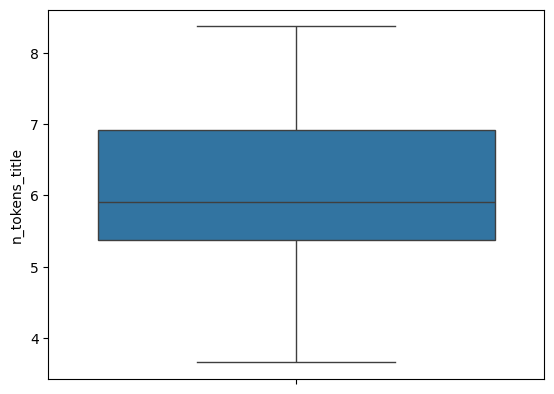

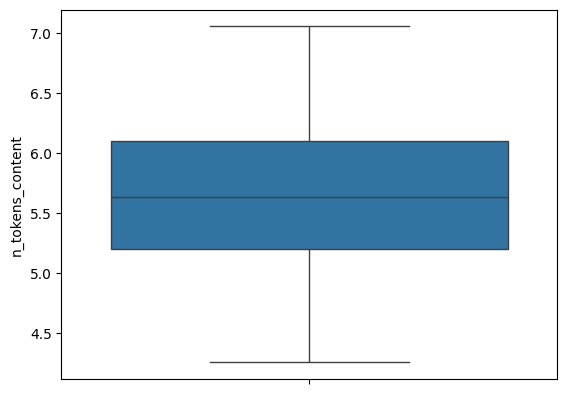

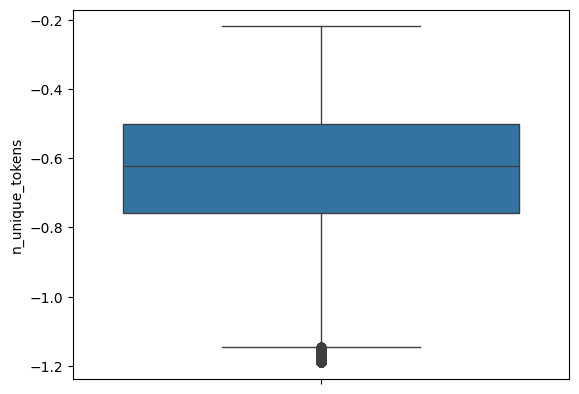

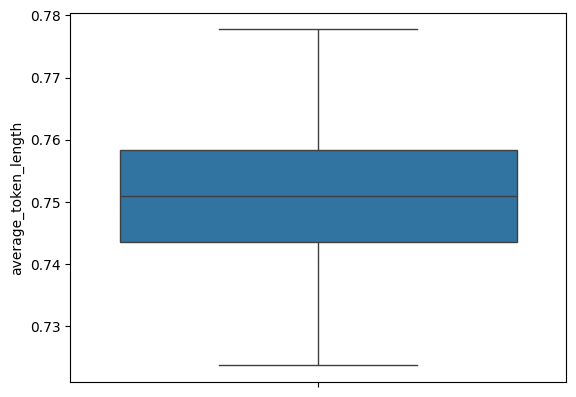

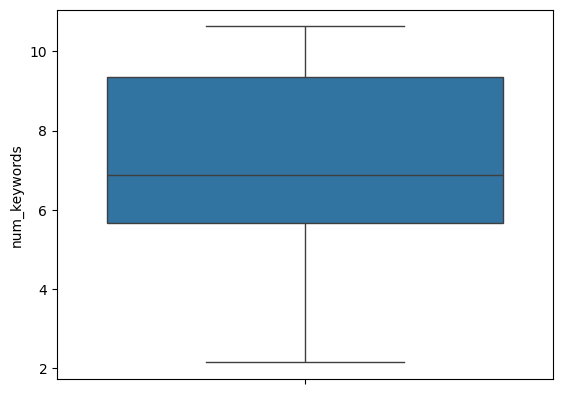

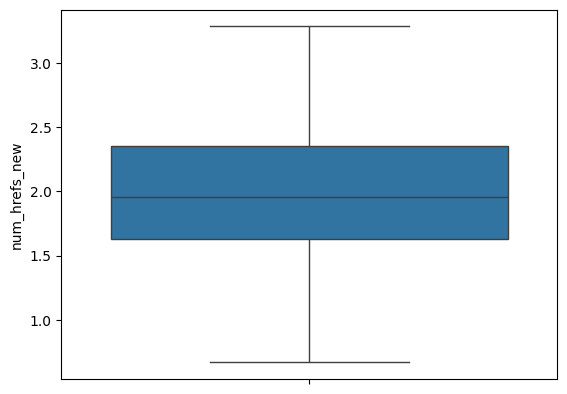

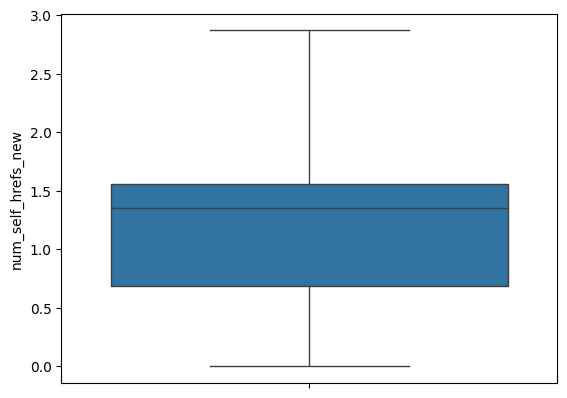

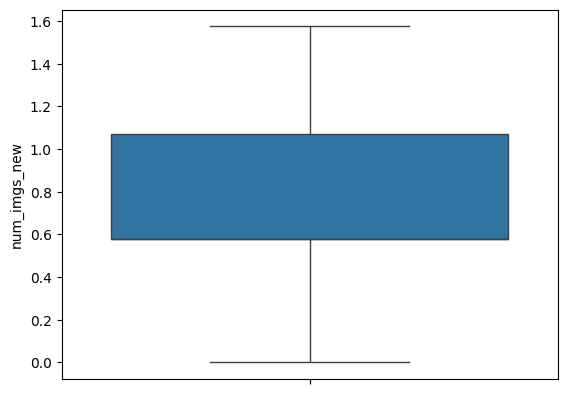

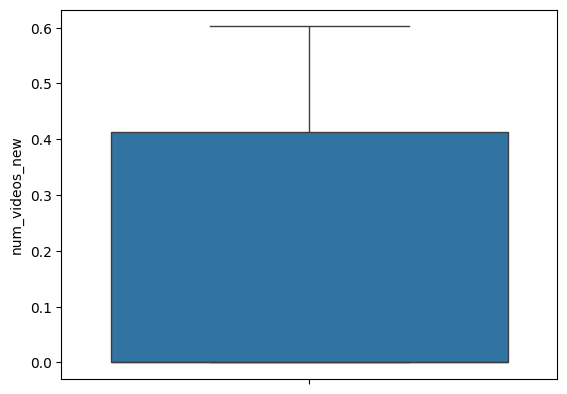

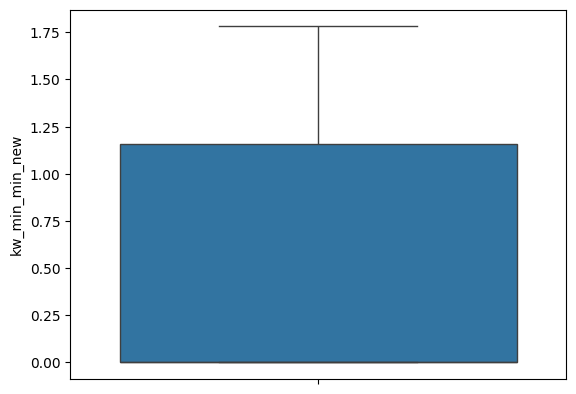

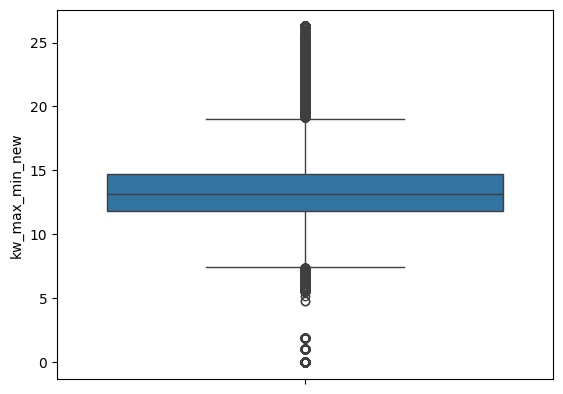

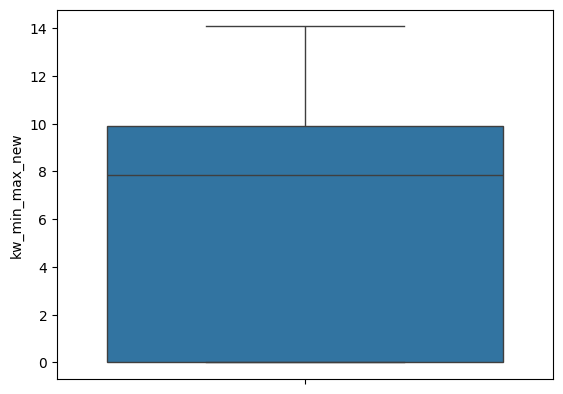

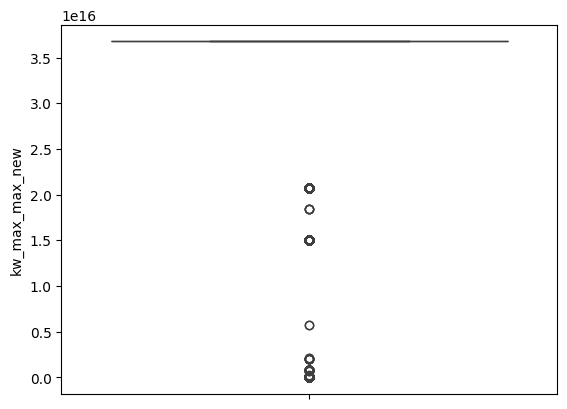

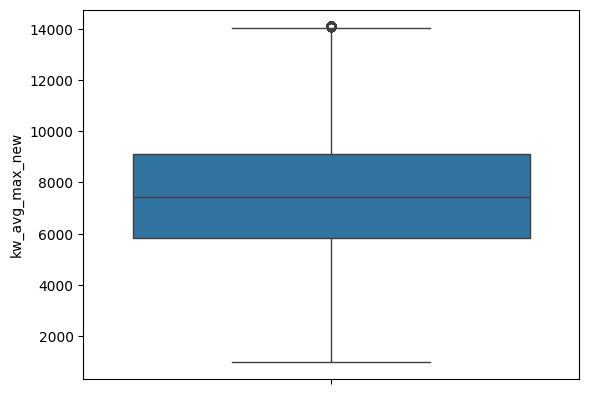

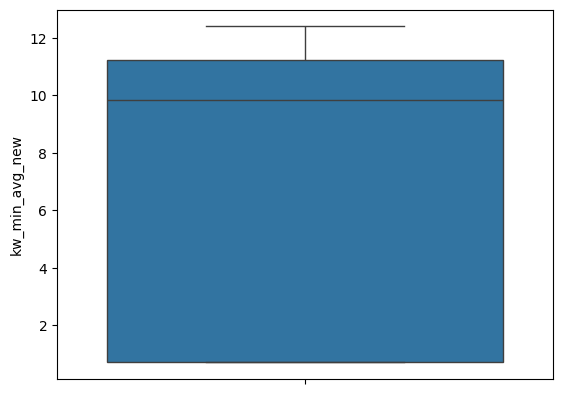

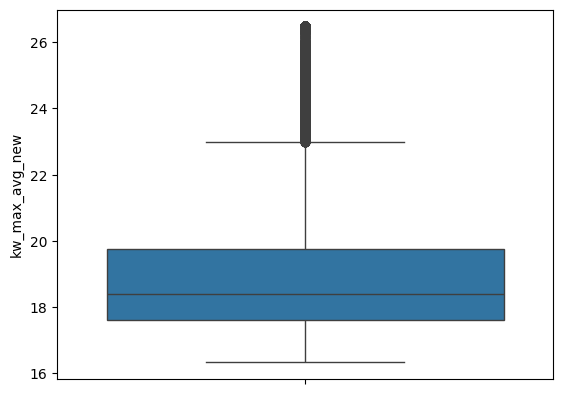

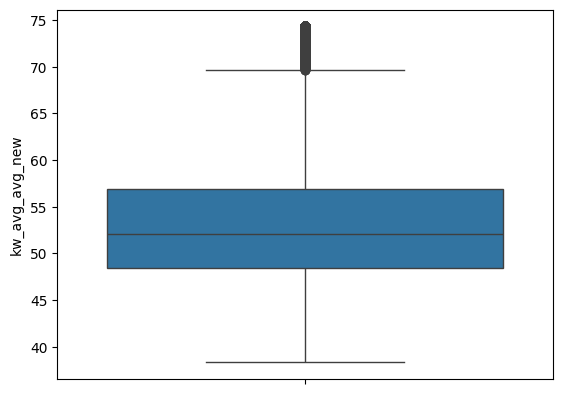

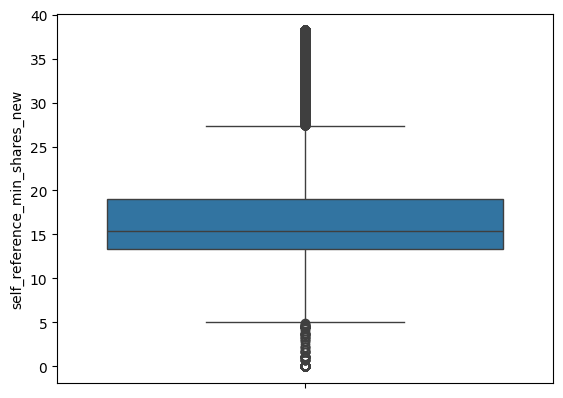

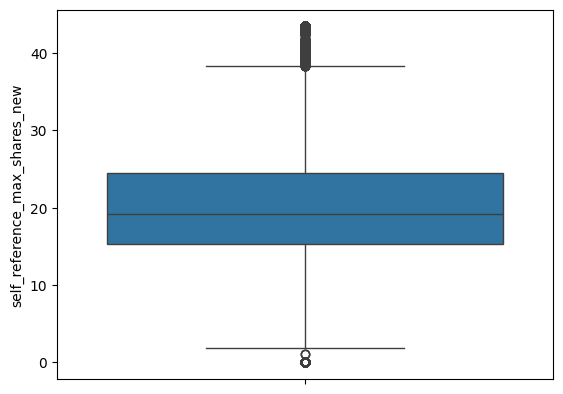

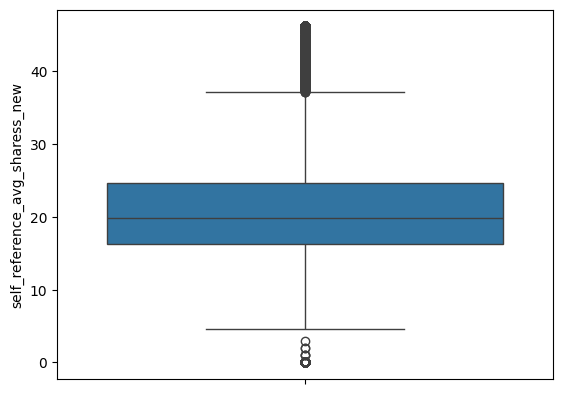

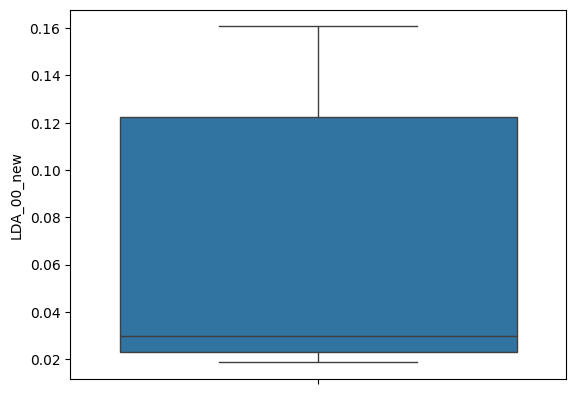

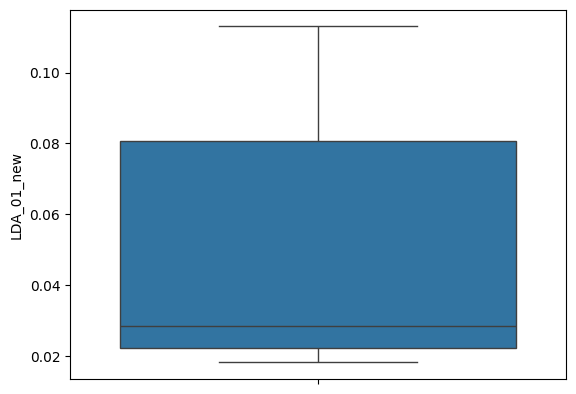

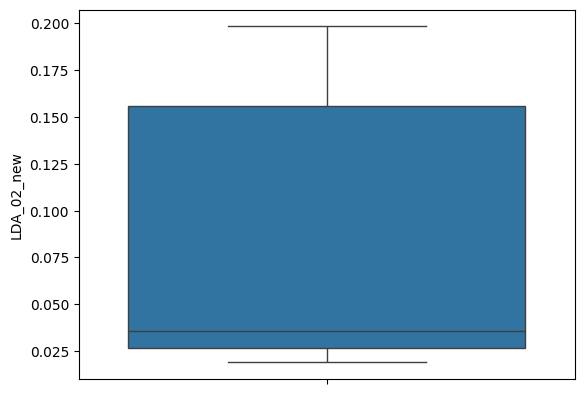

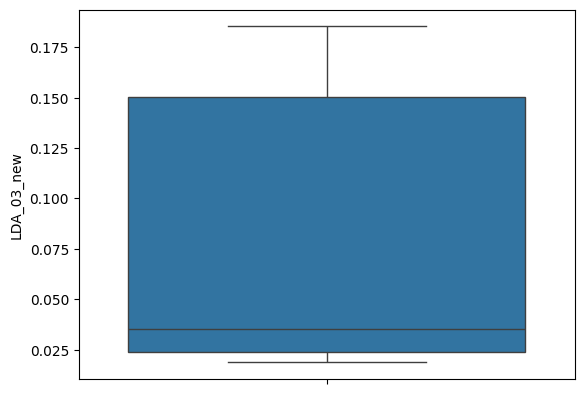

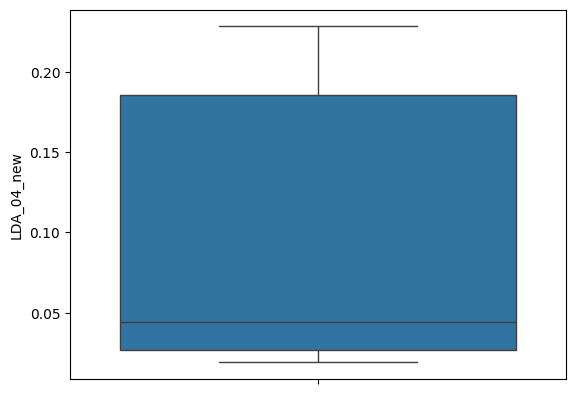

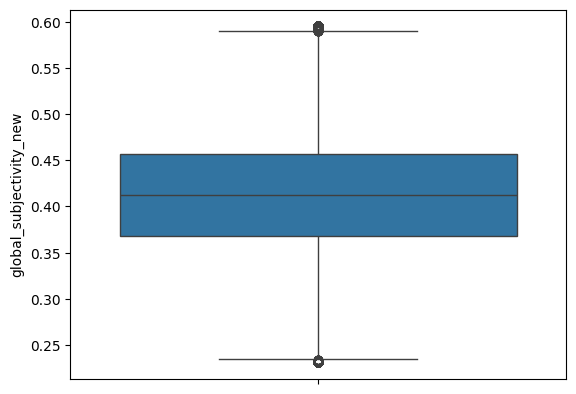

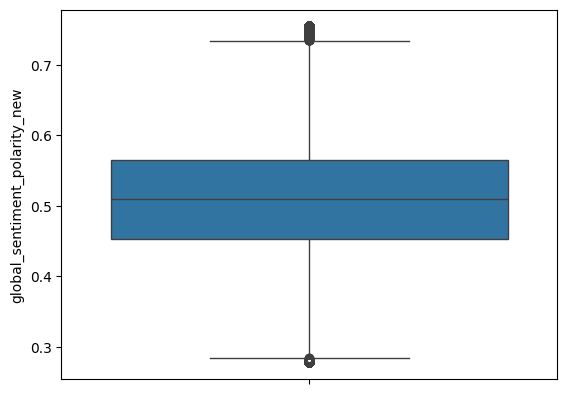

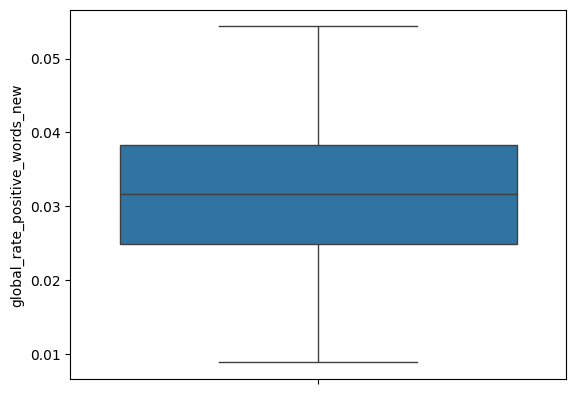

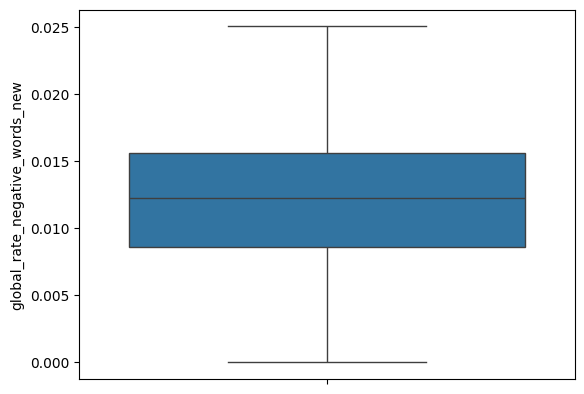

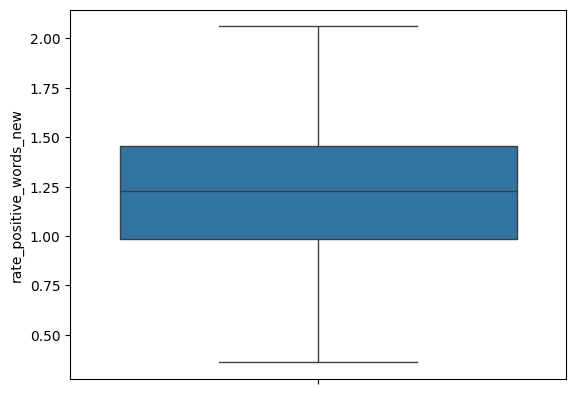

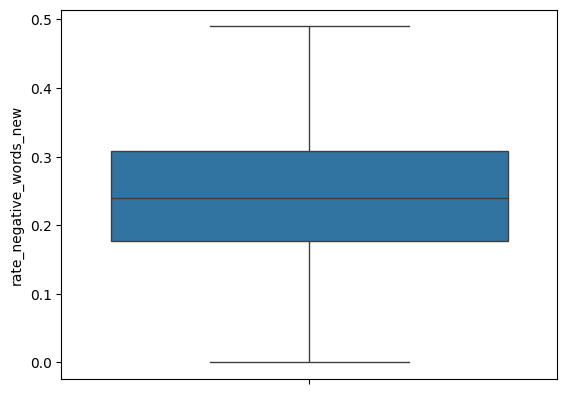

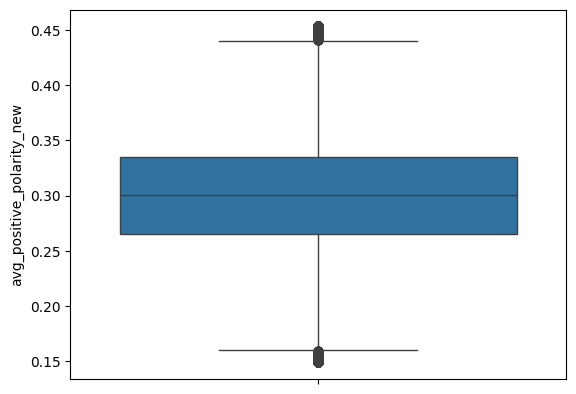

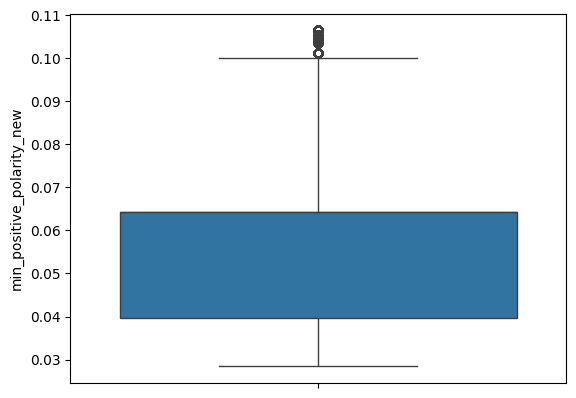

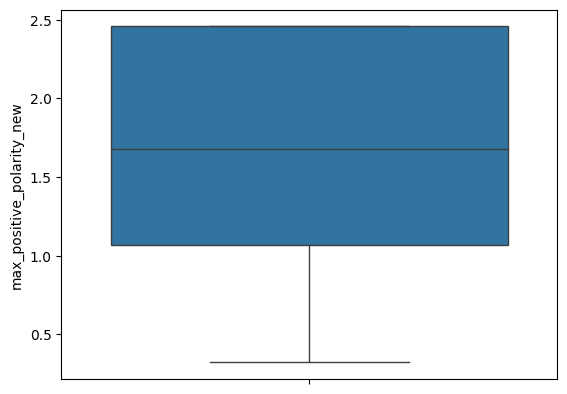

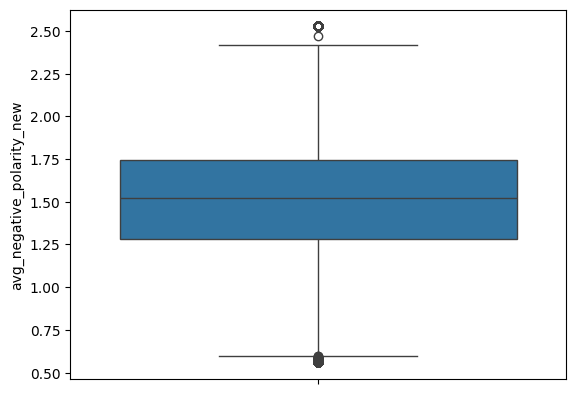

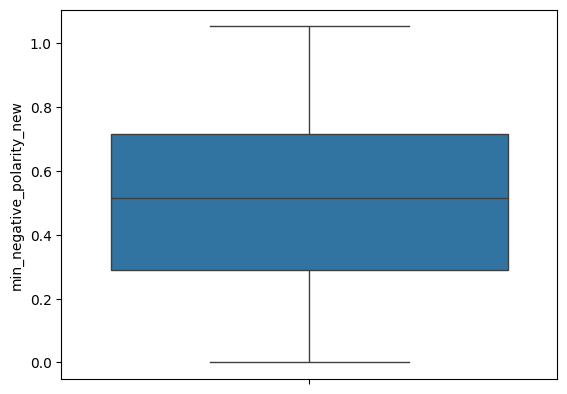

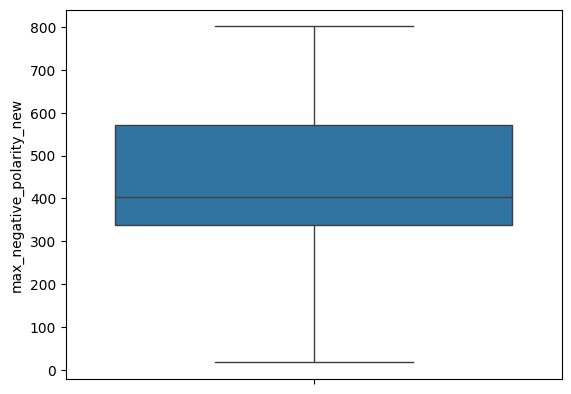

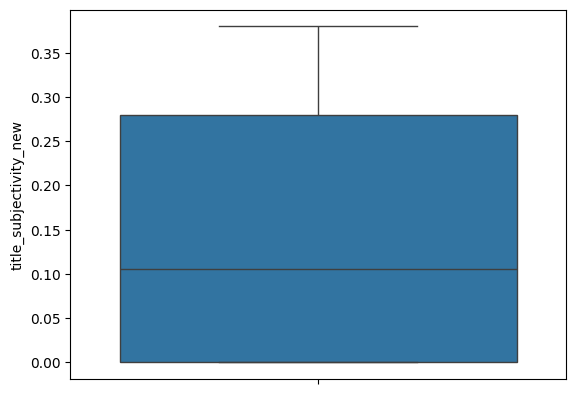

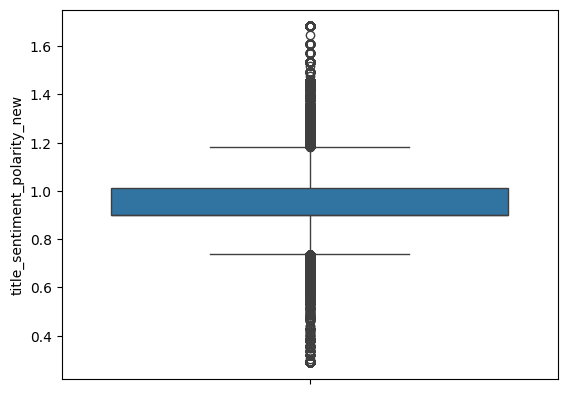

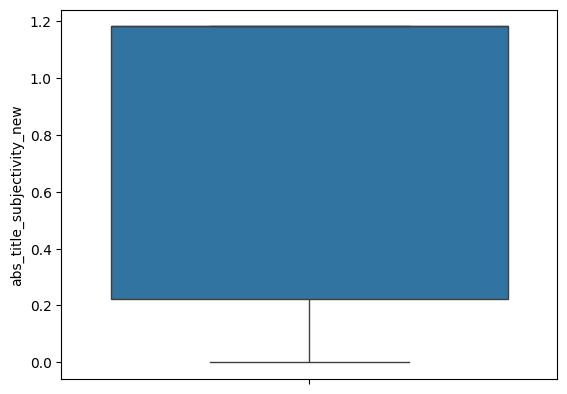

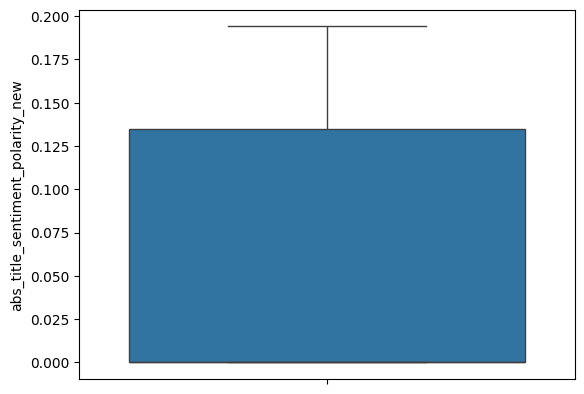

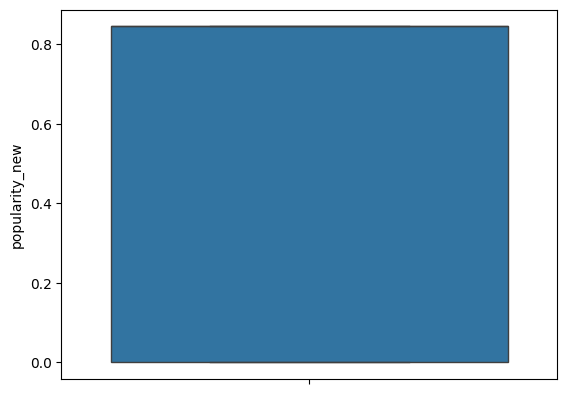

In [109]:
num_cols = df2_num_add.select_dtypes(['int64','float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(df2_num_add[num_cols[i]])
    plt.show()

In [116]:
df2_num_add.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'LDA_00_new', 'LDA_01_new',
       'LDA_02_new', 'LDA_03_new', 'LDA_04_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new',
       'max_negative_polarity_new', 'title_subjectivity_new',
       'title_sentiment_polarity_new

In [117]:
df2_cat.columns

Index(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'ner_counts'],
      dtype='object')

In [127]:
# Combining numeric features and catogorical features.

df_final=pd.concat([df2_num_add,df2_cat, df2_componentes],axis=1)

In [128]:
df_final.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'LDA_00_new', 'LDA_01_new',
       'LDA_02_new', 'LDA_03_new', 'LDA_04_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new',
       'max_negative_polarity_new', 'title_subjectivity_new',
       'title_sentiment_polarity_new

In [129]:
df_final.shape

(39518, 60)

In [130]:
df_final['popularity'] = df['shares'].apply(lambda x: 0 if x <1400 else 1)

In [131]:
df_final.isnull().sum()

n_tokens_title          1055
n_tokens_content        1055
n_unique_tokens         1055
average_token_length    1055
num_keywords            1055
                        ... 
ner_counts              1055
PC1                     1055
PC2                     1055
PC3                     1055
popularity              1055
Length: 61, dtype: int64

In [132]:
df_final=df_final.dropna()

In [133]:
df_final.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'LDA_00_new', 'LDA_01_new',
       'LDA_02_new', 'LDA_03_new', 'LDA_04_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new',
       'max_negative_polarity_new', 'title_subjectivity_new',
       'title_sentiment_polarity_new

In [140]:
df_final = df_final.drop('ner_counts', axis=1)

In [142]:
df_final.shape

(37408, 60)

In [134]:
df_final.shape

(37408, 61)

# Modeling

In [143]:
modelscore=[]
X=df_final.drop(['popularity','popularity_new'],axis=1)
y=df_final['popularity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [144]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time

    results['train_time'] = end-start
        
    # Get predictions on the first 4000 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:4000])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute accuracy on the first 4000 training samples
    results['acc_train'] = accuracy_score(y_train[:4000],predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the first 4000 training samples
    results['f_train'] = fbeta_score(y_train[:4000],predictions_train,beta=1)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=1)
    
    # Compute AUC on the the first 4000 training samples
    results['auc_train'] = roc_auc_score(y_train[:4000],predictions_train)
        
    # Compute AUC on the test set
    results['auc_test'] = roc_auc_score(y_test,predictions_test)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print ("{} with accuracy {}, F1 {} and AUC {}.".format(learner.__class__.__name__,\
          results['acc_test'],results['f_test'], results['auc_test']) )
    # Return the results
    #cm=confusion_matrix(y_test,predictions_test)
    #df_cm = pd.DataFrame(cm, range(2), range(2))
    # plt.figure(figsize=(10,7))
    #sns.set(font_scale=1.4) # for label size
    #sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

    #plt.show()
    return results

In [138]:
import matplotlib.patches as mpatches
def evaluate(results,name):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 4, figsize = (16,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'auc_train','pred_time', 'acc_test',\
                                    'f_test', 'auc_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//4, j%4].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//4, j%4].set_xticks([0.45, 1.45, 2.45])
                ax[j//4, j%4].set_xticklabels(["1%", "10%", "100%"])
                ax[j//4, j%4].set_xlim((-0.1, 3.0))
    
    # Add labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[0, 3].set_ylabel("AUC")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    ax[1, 3].set_ylabel("AUC")
    ax[1, 0].set_xlabel("Training Set Size")
    ax[1, 1].set_xlabel("Training Set Size")
    ax[1, 2].set_xlabel("Training Set Size")
    ax[1, 3].set_xlabel("Training Set Size")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[0, 3].set_title("AUC on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    ax[1, 3].set_title("AUC on Testing Subset")
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[0, 3].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))
    ax[1, 3].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches,  bbox_to_anchor = (-1.4, 2.54),\
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.savefig(name)
    plt.tight_layout()
    plt.show()

AdaBoostClassifier trained on 299 samples.
AdaBoostClassifier with accuracy 0.5447741245656241, F1 0.5920958083832335 and AUC 0.5394069888857521.
AdaBoostClassifier trained on 2992 samples.
AdaBoostClassifier with accuracy 0.6031809676557071, F1 0.6528703378931369 and AUC 0.5962440935437532.
AdaBoostClassifier trained on 29926 samples.
AdaBoostClassifier with accuracy 0.6206896551724138, F1 0.6756571428571428 and AUC 0.6120508826818385.
LogisticRegression trained on 299 samples.
LogisticRegression with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
LogisticRegression trained on 2992 samples.
LogisticRegression with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
LogisticRegression trained on 29926 samples.
LogisticRegression with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
RandomForestClassifier trained on 299 samples.
RandomForestClassifier with accuracy 0.5265971665330126, F1 0.6116228070175439 and AUC 0.5141831394966988.
RandomFor

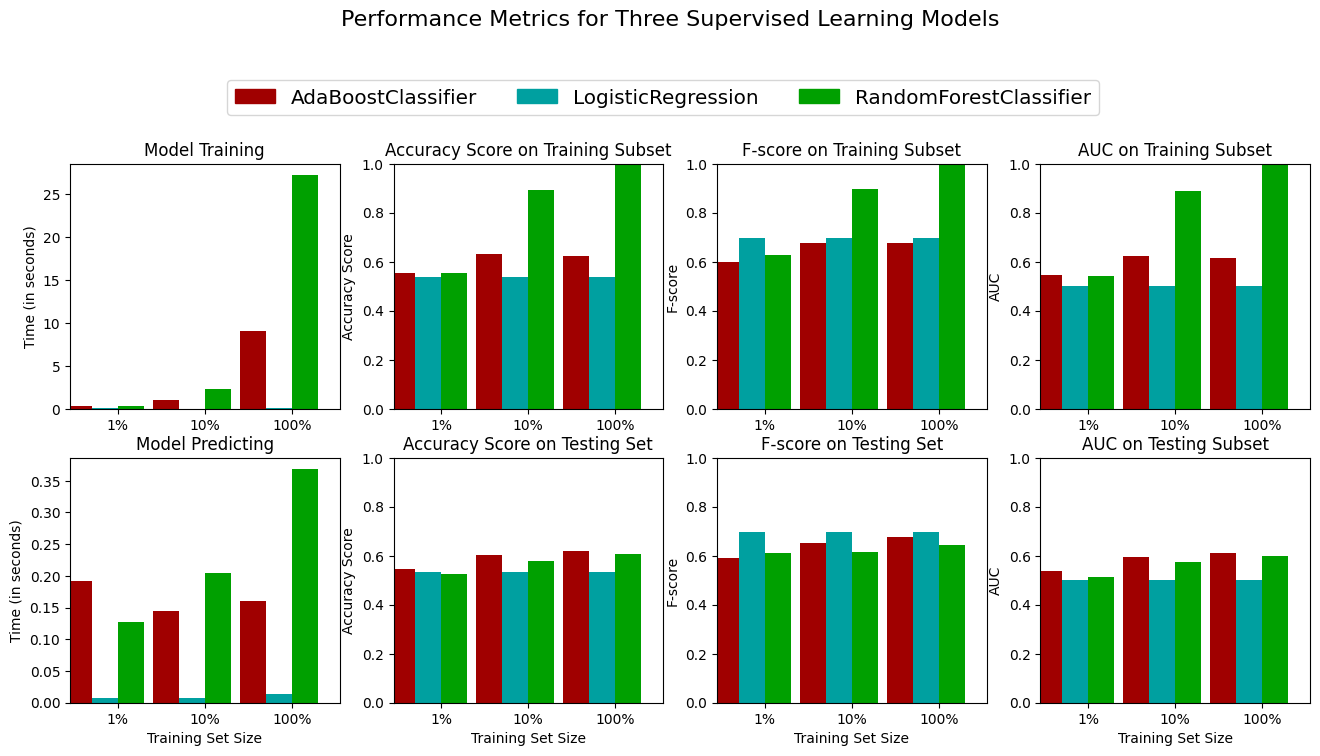

In [146]:
# Import the three supervised learning models from sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from time import time
from IPython.display import display
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score

# Initialize the three models
clf_A = AdaBoostClassifier(random_state=0)
clf_B = LogisticRegression(random_state=0,C=1.0)
clf_C = RandomForestClassifier(random_state=0)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train.shape[0]*0.01)
samples_10 = int(X_train.shape[0]*0.1)
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results,'perf_unopt.pdf')

GaussianNB trained on 299 samples.
GaussianNB with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
GaussianNB trained on 2992 samples.
GaussianNB with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
GaussianNB trained on 29926 samples.
GaussianNB with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
SVC trained on 299 samples.
SVC with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
SVC trained on 2992 samples.
SVC with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
SVC trained on 29926 samples.
SVC with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.


  File "c:\Users\sebas\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\sebas\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sebas\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                

KNeighborsClassifier trained on 299 samples.
KNeighborsClassifier with accuracy 0.5235231221598503, F1 0.6586230010533372 and AUC 0.4991296032028535.
KNeighborsClassifier trained on 2992 samples.
KNeighborsClassifier with accuracy 0.5236567762630313, F1 0.6578341013824884 and AUC 0.49950805999923775.
KNeighborsClassifier trained on 29926 samples.
KNeighborsClassifier with accuracy 0.5233894680566693, F1 0.6577078133998848 and AUC 0.49922144492328474.


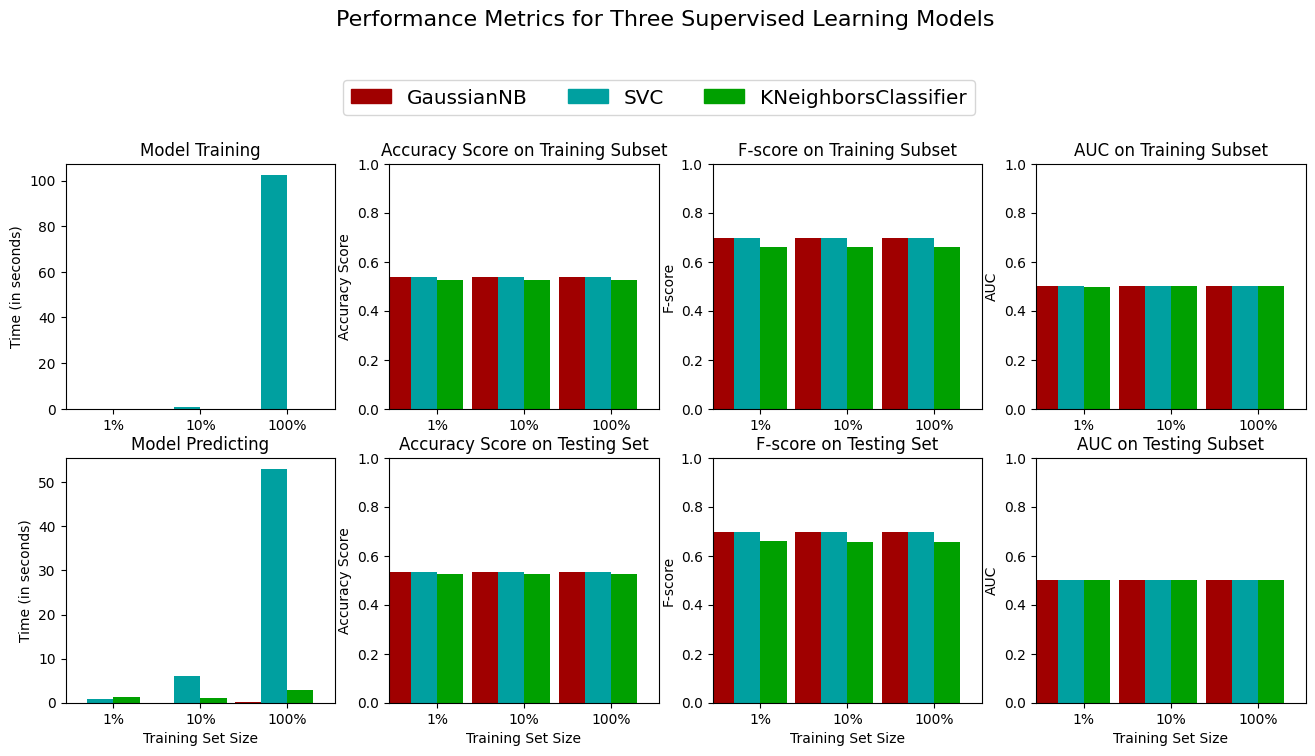

In [147]:
# Initialize the three models
import sklearn
from sklearn.neighbors import KNeighborsClassifier
clf_A =GaussianNB()
clf_B = SVC(random_state=0,C=1.0)
clf_C = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train.shape[0]*0.01)
samples_10 = int(X_train.shape[0]*0.1)
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results,'perf_unopt1.pdf')

GaussianNB trained on 299 samples.
GaussianNB with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
GaussianNB trained on 2992 samples.
GaussianNB with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
GaussianNB trained on 29926 samples.
GaussianNB with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
SVC trained on 299 samples.
SVC with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
SVC trained on 2992 samples.
SVC with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
SVC trained on 29926 samples.
SVC with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
KNeighborsClassifier trained on 299 samples.
KNeighborsClassifier with accuracy 0.5235231221598503, F1 0.6586230010533372 and AUC 0.4991296032028535.
KNeighborsClassifier trained on 2992 samples.
KNeighborsClassifier with accuracy 0.5236567762630313, F1 0.6578341013824884 and AUC 0.49950805999923775.
KNeighborsClassifier trained on 29926 sample

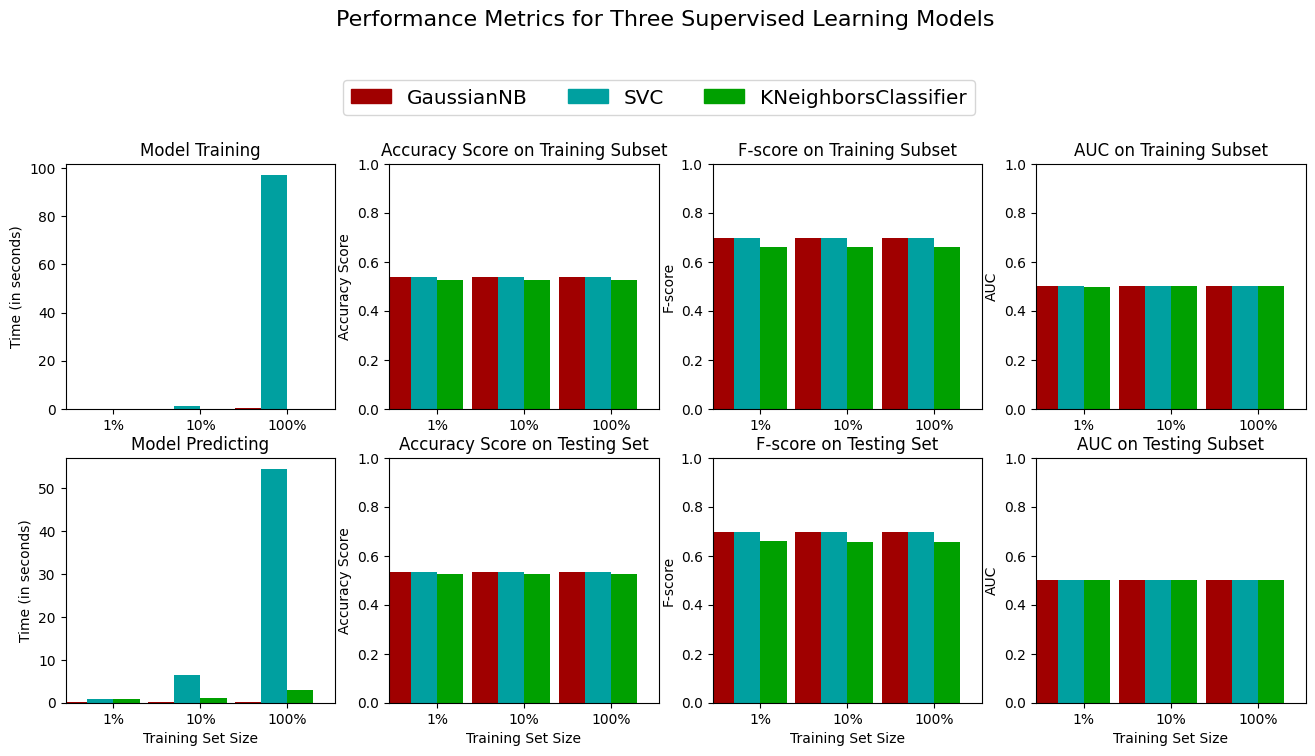

In [148]:
# Initialize the three models
import sklearn
from sklearn.neighbors import KNeighborsClassifier
clf_A =GaussianNB()
clf_B = SVC(random_state=0,C=1.0)
clf_C = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train.shape[0]*0.01)
samples_10 = int(X_train.shape[0]*0.1)
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results,'perf_unopt1.pdf')

In [150]:
# LIGHTGBM MODEL:
import lightgbm as lgb

In [151]:
lgbm=lgb.LGBMClassifier()
lgbm.fit(X_train,y_train)
#y_test1=np.array_test).reshape(-1,1)
y_pred=lgbm.predict(X_test)
#print('Score on train set ',score(X_train,y_train))
print('accuracy on test set ',accuracy_score(y_test,y_pred))

[LightGBM] [Info] Number of positive: 15972, number of negative: 13954
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8265
[LightGBM] [Info] Number of data points in the train set: 29926, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.533717 -> initscore=0.135071
[LightGBM] [Info] Start training from score 0.135071
accuracy on test set  0.6180165731087944


In [152]:
type(y_test)

pandas.core.series.Series

## Feature Selection

In [ ]:
# Feature selection
# USING BACKWARD ELIMINATION
from sklearn.feature_selection import RFE
cols=df_final.columns
model=RandomForestClassifier()
rfe=RFE(estimator=model, n_features_to_select=57)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]


In [155]:
#Best model till now :Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_train=rf.predict(x_train)
y_prob_train=rf.predict_proba(x_train)[:,1]

y_pred=rf.predict(x_test)
y_prob=rf.predict_proba(x_test)[:,1]  #used to find AUC of train and test

from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

print('Accuracy of Random forest train :',accuracy_score(y_pred_train,y_train))
print('Accuracy of Random forest test:',accuracy_score(y_pred,y_test))


print('AUC of Random forest train :',roc_auc_score(y_train,y_prob_train))
print('AUC of Random forest test :',roc_auc_score(y_test,y_prob))



Accuracy of Random forest train : 1.0
Accuracy of Random forest test: 0.6083934776797648
AUC of Random forest train : 1.0
AUC of Random forest test : 0.6458605061158759


<Axes: >

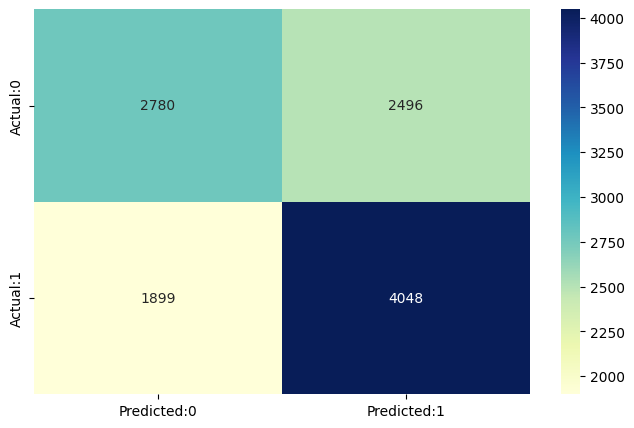

In [156]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

## Hyperparameter tuning of random forest  #randomsearch

In [157]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
rf=RandomForestClassifier(random_state=1)

params={'n_estimators':sp_randint(5,25),
       'criterion':['gini','entropy'],
       'max_depth':sp_randint(2,10),
       'min_samples_split':sp_randint(2,20),
       'min_samples_leaf':sp_randint(1,20),
       'max_features':sp_randint(2,15)}
rand_search_rfc=RandomizedSearchCV(rf,param_distributions=params,cv=3,random_state=1)

rand_search_rfc.fit(X,y)

print(rand_search_rfc.best_params_)


{'criterion': 'gini', 'max_depth': 5, 'max_features': 14, 'min_samples_leaf': 11, 'min_samples_split': 16, 'n_estimators': 23}


In [158]:
rf=RandomForestClassifier(**rand_search_rfc.best_params_)
rf.fit(x_train,y_train)
y_pred_train=rf.predict(x_train)
y_prob_train=rf.predict_proba(x_train)[:,1]

y_pred=rf.predict(x_test)
y_prob=rf.predict_proba(x_test)[:,1]  #used to find AUC of train and test

from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

print('Accuracy of Random forest train :',accuracy_score(y_pred_train,y_train))
print('Accuracy of random forest test :',accuracy_score(y_pred,y_test))


print('AUC of random forest train :',roc_auc_score(y_train,y_prob_train))
print('AUC of random forest test :',roc_auc_score(y_test,y_prob))

Accuracy of Random forest train : 0.6265801031124689
Accuracy of random forest test : 0.620065936024236
AUC of random forest train : 0.6797567612086248
AUC of random forest test : 0.6569044534530634


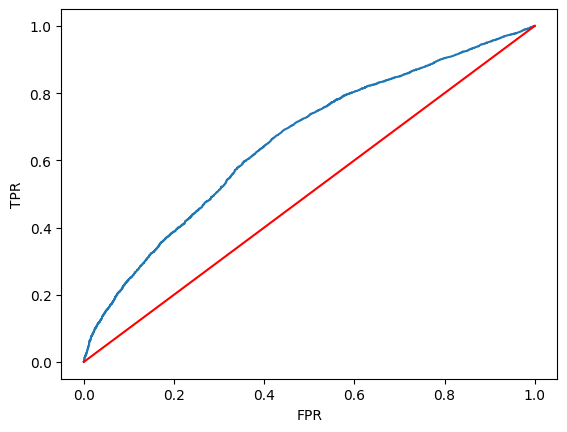

In [159]:
fpr,tpr,threshold=roc_curve(y_test,y_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
# Crear un DataFrame con las predicciones
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Guardar el DataFrame en un archivo .csv
predictions_df.to_csv('model predictions.csv', index=False)

print("File 'model_predictions.csv' created with success.")

NameError: name 'pd' is not defined